In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import seaborn as sns
import scipy.stats as st
import datetime as dt
import matplotlib.pyplot as plt
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa19/data.csv


In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
df=pd.read_csv('/kaggle/input/fifa19/data.csv')

In [4]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Feature Engineering

In [5]:
df.isna().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [6]:
df.dtypes

Unnamed: 0                    int64
ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                      

In [7]:
df_num=[f for f in df.columns if df[f].dtype=="float64" or df[f].dtype=="int"]

In [8]:
df[df_num].head()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,20801,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,190871,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,193080,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,192985,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [9]:
df_cat=[f for f in df.columns if df[f].dtype=="O"]

In [10]:
df[df_cat].head()

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
0,L. Messi,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,Medium/ Medium,Messi,Yes,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,€226.5M
1,Cristiano Ronaldo,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,High/ Low,C. Ronaldo,Yes,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,€127.1M
2,Neymar Jr,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,High/ Medium,Neymar,Yes,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,€228.1M
3,De Gea,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,Medium/ Medium,Lean,Yes,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€138.6M
4,K. De Bruyne,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,High/ High,Normal,Yes,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,€196.4M


In [11]:
df['Value'].unique()

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

In [12]:
df['Value_new']=df['Value']

In [13]:
def convert_cash(var):
    for i in df[var]:
        new=i[1:]
        if new[-1]=="M":
            val=float(new[:-1])*100
            df[var].replace(i,str(val),inplace=True)      
        elif new[-1]=="K":
            val=float(new[:-1])
            df[var].replace(i,str(val),inplace=True)

    for i in df[var]:
        if i[0]=="€":
            val=i[1:]
            df[var].replace(i,str(val),inplace=True)
    df[var]=df[var].astype(float)

In [14]:
convert_cash("Value")

In [15]:
convert_cash('Wage')

In [16]:
df["Value"].dtype

dtype('float64')

# Handling Nan Values

In [17]:
def Random_sample(var):
    random_sample=df[var].dropna().sample(df[var].isnull().sum(),random_state=0)
    random_sample.index=df[df[var].isnull()].index
    df.loc[df[var].isna(),var]=random_sample

In [18]:
def impute_nan_mean(var):
    df[var].fillna(df[var].mean(),inplace=True)

In [19]:
def impute_nan_mode(var):
    df[var].fillna(df[var].mode(),inplace=True)

In [20]:
Random_sample("Release Clause")

In [21]:
convert_cash("Release Clause")

In [22]:
df['Height'].unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9", nan], dtype=object)

In [23]:
df['Height'].isna().sum()

48

In [24]:
df["Height_bool"]=df["Height"].isnull()

In [25]:
for i,j in zip(df['Height'],df['Height_bool']):
    if j==True:
        pass
    else:
        val=f'{i[0]}.{i[-1]}'
        df['Height'].replace(i,val,inplace=True)

In [26]:
df['Height'].unique()

array(['5.7', '6.2', '5.9', '6.4', '5.1', '5.8', '6.0', '5.6', '5.0',
       '6.6', '6.1', '5.4', '6.3', '5.5', '6.5', '6.7', '5.3', '5.2',
       '6.8', '6.9', nan], dtype=object)

In [27]:
df['Height']=df['Height'].astype(float)

In [28]:
def impute_nan_median(var):
    df[var+"median"]=df[var].fillna(df[var].median())

In [29]:
df=df.drop('Height_bool',axis=1)

In [30]:
impute_nan_median('Height')

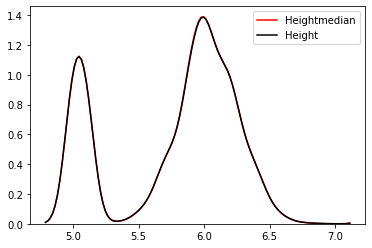

In [31]:
sns.kdeplot(df['Heightmedian'],color='red')
sns.kdeplot(df['Height'],color='black')
plt.show()

In [32]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Value_new,Heightmedian
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,11050.0,565.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5.7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,22650.0,€110.5M,5.7
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,7700.0,405.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6.2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,12710.0,€77M,6.2
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,11850.0,290.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5.9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,22810.0,€118.5M,5.9
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,7200.0,260.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6.4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13860.0,€72M,6.4
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,10200.0,355.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5.1,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,19640.0,€102M,5.1


In [33]:
df=df.drop(['Value_new','Heightmedian'],axis=1)

In [34]:
df['Weight'].unique()

array(['159lbs', '183lbs', '150lbs', '168lbs', '154lbs', '163lbs',
       '146lbs', '190lbs', '181lbs', '192lbs', '176lbs', '172lbs',
       '148lbs', '165lbs', '196lbs', '161lbs', '187lbs', '212lbs',
       '170lbs', '203lbs', '157lbs', '185lbs', '130lbs', '174lbs',
       '207lbs', '134lbs', '141lbs', '152lbs', '179lbs', '132lbs',
       '201lbs', '198lbs', '209lbs', '214lbs', '143lbs', '205lbs',
       '137lbs', '194lbs', '216lbs', '139lbs', '220lbs', '126lbs',
       '218lbs', '123lbs', '227lbs', '128lbs', '223lbs', '225lbs',
       '121lbs', '115lbs', '117lbs', '236lbs', '229lbs', '243lbs', nan,
       '110lbs', '119lbs', '234lbs'], dtype=object)

In [35]:
df['Weight_bool']=df["Weight"].isna()

In [36]:
def convert_weight(var):
    for i,j in zip(df[var],df[var+"_bool"]):
        if j==True:
            pass
        else:
            df[var].replace(i,i[:3],inplace=True)

In [37]:
convert_weight("Weight")

In [38]:
df['Weight']=df['Weight'].astype(float)

In [39]:
print(df['Weight'].mode())
print(df['Weight'].median())
print(df['Weight'].mean())

0    165.0
dtype: float64
165.0
165.97912880665234


In [40]:
impute_nan_mode('Weight')

In [41]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_bool
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,11050.0,565.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5.7,159.0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,22650.0,False
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,7700.0,405.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6.2,183.0,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,12710.0,False
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,11850.0,290.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5.9,150.0,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,22810.0,False
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,7200.0,260.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6.4,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13860.0,False
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,10200.0,355.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5.1,154.0,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,19640.0,False


In [42]:
df['LS'].unique()

array(['88+2', '91+3', '84+3', nan, '82+3', '83+3', '77+3', '87+5',
       '73+3', '87+3', '78+3', '64+3', '72+3', '86+3', '71+3', '85+3',
       '58+3', '80+3', '76+3', '79+3', '69+3', '66+3', '70+3', '52+3',
       '81+3', '68+3', '82+2', '75+2', '62+3', '74+3', '75+3', '67+3',
       '65+3', '61+3', '57+2', '81+2', '49+3', '74+2', '63+3', '60+3',
       '82+4', '61+2', '56+2', '64+2', '77+2', '59+3', '70+2', '57+3',
       '72+2', '55+3', '78+2', '59+2', '73+2', '76+2', '52+2', '80+2',
       '79+2', '56+3', '53+2', '58+2', '69+2', '51+3', '66+2', '67+2',
       '68+2', '65+2', '62+2', '55+2', '71+2', '63+2', '60+2', '54+2',
       '49+2', '50+2', '51+2', '48+2', '47+2', '47+3', '46+2', '42+2',
       '44+2', '45+2', '43+2', '40+2', '39+2', '37+2', '41+2', '38+2',
       '36+2', '34+2', '35+2', '31+2', '33+2', '32+2'], dtype=object)

In [43]:
def convert_str(var):
    for i in df[var]:
        if i==False:
            pass
        else:
            val=f'{i[0:2]}{i[-1]}'
            df[var].replace(i,val,inplace=True)
    df[var]=df[var].astype(float)
    

In [44]:
all_str=["LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB","LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB"]
for i in all_str:
    df[i].fillna(False,inplace=True)

In [45]:
for i in all_str:
    convert_str(i)

In [46]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_bool
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,11050.0,565.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5.7,159.0,882.0,882.0,882.0,922.0,932.0,932.0,932.0,922.0,932.0,932.0,932.0,912.0,842.0,842.0,842.0,912.0,642.0,612.0,612.0,612.0,642.0,592.0,472.0,472.0,472.0,592.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,22650.0,False
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,7700.0,405.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6.2,183.0,913.0,913.0,913.0,893.0,903.0,903.0,903.0,893.0,883.0,883.0,883.0,883.0,813.0,813.0,813.0,883.0,653.0,613.0,613.0,613.0,653.0,613.0,533.0,533.0,533.0,613.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,12710.0,False
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,11850.0,290.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5.9,150.0,843.0,843.0,843.0,893.0,893.0,893.0,893.0,893.0,893.0,893.0,893.0,883.0,813.0,813.0,813.0,883.0,653.0,603.0,603.0,603.0,653.0,603.0,473.0,473.0,473.0,603.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,22810.0,False
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,7200.0,260.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6.4,168.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13860.0,False
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,10200.0,355.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5.1,154.0,823.0,823.0,823.0,873.0,873.0,873.0,873.0,873.0,883.0,883.0,883.0,883.0,873.0,873.0,873.0,883.0,773.0,773.0,773.0,773.0,773.0,733.0,663.0,663.0,663.0,733.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,19640.0,False


In [47]:
def convert_to_nan(var):
    df[var]=np.where(df[var]==0,np.nan,df[var])

In [48]:
for i in all_str:
    convert_to_nan(i)

In [49]:
df[all_str].isna().sum()

LS     2085
ST     2085
RS     2085
LW     2085
LF     2085
CF     2085
RF     2085
RW     2085
LAM    2085
CAM    2085
RAM    2085
LM     2085
LCM    2085
CM     2085
RCM    2085
RM     2085
LWB    2085
LDM    2085
CDM    2085
RDM    2085
RWB    2085
LB     2085
LCB    2085
CB     2085
RCB    2085
RB     2085
dtype: int64

In [50]:
for i in all_str:
    impute_nan_mean(i)

In [51]:
df[all_str].isna().sum()

LS     0
ST     0
RS     0
LW     0
LF     0
CF     0
RF     0
RW     0
LAM    0
CAM    0
RAM    0
LM     0
LCM    0
CM     0
RCM    0
RM     0
LWB    0
LDM    0
CDM    0
RDM    0
RWB    0
LB     0
LCB    0
CB     0
RCB    0
RB     0
dtype: int64

In [52]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_bool
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,11050.0,565.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5.7,159.0,882.000000,882.000000,882.000000,922.000000,932.000000,932.000000,932.000000,922.000000,932.000000,932.000000,932.000000,912.000000,842.000000,842.000000,842.000000,912.000000,642.000000,612.000000,612.000000,612.000000,642.000000,592.000000,472.000000,472.000000,472.000000,592.000000,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,22650.0,False
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,7700.0,405.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6.2,183.0,913.000000,913.000000,913.000000,893.000000,903.000000,903.000000,903.000000,893.000000,883.000000,883.000000,883.000000,883.000000,813.000000,813.000000,813.000000,883.000000,653.000000,613.000000,613.000000,613.000000,653.000000,613.000000,533.000000,533.000000,533.000000,613.000000,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,12710.0,False
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,11850.0,290.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5.9,150.0,843.000000,843.000000,843.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,883.000000,813.000000,813.000000,813.000000,883.000000,653.000000,603.000000,603.000000,603.000000,653.000000,603.000000,473.000000,473.000000,473.000000,603.000000,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,22810.0,False
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,7200.0,260.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6.4,168.0,580.175226,580.175226,580.175226,592.397035,589.214427,589.214427,589.214427,592.397035,591.851817,591.851817,591.851817,599.367634,584.229314,584.229314,584.229314,599.367634,577.153269,570.271989,570.271989,570.271989,577.153269,570.088389,558.166791,558.166791,558.166791,570.088389,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13860.0,False
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,10200.0,355.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"A

In [53]:
df=df.drop(['ID','Unnamed: 0','Photo','Flag','Club Logo','Weight_bool'],axis=1)

In [54]:
df['Contract Valid Until'].unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', 'Jun 30, 2019',
       '2025', '2026', 'Dec 31, 2018', '2018', nan, 'May 31, 2020',
       'Jun 30, 2020', 'May 31, 2019', 'Dec 31, 2019', 'Jan 1, 2019',
       'Jun 1, 2019', 'Jan 4, 2019', 'Jan 31, 2019', 'Jan 7, 2019',
       'Jan 2, 2019', 'Jan 6, 2019', 'Oct 14, 2019', 'Jan 3, 2019',
       'May 4, 2019', 'Jan 12, 2019', 'Jan 25, 2019', 'Jan 18, 2019',
       'Dec 1, 2019', 'Nov 30, 2018', 'Feb 27, 2020', 'Jan 5, 2019',
       'Jan 15, 2019', 'Jan 30, 2019', 'Jan 11, 2019', 'Jan 20, 2019'],
      dtype=object)

In [55]:
df['Contract Valid Until'].fillna(False,inplace=True)

In [56]:
def convert_date(var):
    for i in df[var]:
        if i==False:
            pass
        else:
            val=i[-4:]
            df[var].replace(i,val,inplace=True)

In [57]:
convert_date("Contract Valid Until")

In [58]:
df['Contract Valid Until'].unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', '2025', '2026',
       '2018', False], dtype=object)

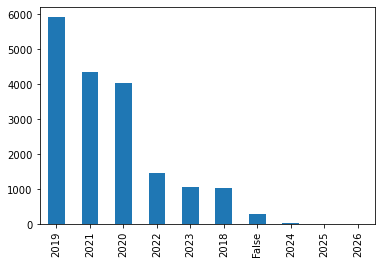

In [59]:
df['Contract Valid Until'].value_counts().plot(kind='bar')

In [60]:
convert_to_nan('Contract Valid Until')

In [61]:
df['Contract Valid Until'].fillna('2024',inplace=True)

In [62]:
df['Joined'].unique()

array(['Jul 1, 2004', 'Jul 10, 2018', 'Aug 3, 2017', ..., 'May 22, 2017',
       'Nov 6, 2016', 'Nov 27, 2018'], dtype=object)

In [63]:
df["Joined"].fillna(False,inplace=True)

In [64]:
month={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
df['Joined']=np.where(df['Joined']==' ...',False,df['Joined'])

In [65]:
for i in df["Joined"]:
    if i==False:
        pass
    else:
        year=i[-4:]
    df["Joined"].replace(i,year,inplace=True)
    

In [66]:
df["Joined"].unique()

array(['2004', '2018', '2017', '2011', '2015', '2012', '2014', '2005',
       '2010', '2016', '2008', '2013', '2007', '2009', '2002', '2003',
       '2006', '2001', '1991', '1998', '2000', '1999'], dtype=object)

In [67]:
df['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low', nan], dtype=object)

In [68]:
df["Work Rate"].fillna(False,inplace=True)

In [69]:
for i in df["Work Rate"]:
    if i==False:
        pass
    else:
        try:
            ind=i.index("/")
            df["Work Rate"].replace(i,i[ind+2:],inplace=True)
        except:
            pass

In [70]:
df['Work Rate']=np.where(df['Work Rate']==False,np.nan,df["Work Rate"])

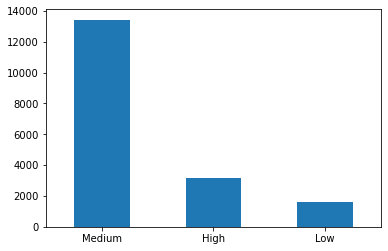

In [71]:
df['Work Rate'].value_counts().plot(kind='bar',rot=0)

In [72]:
Random_sample("Work Rate")

In [73]:
work_rate_encoding={' Low':0,' Medium':1,' High':2}

In [74]:
df["Work Rate"]=df["Work Rate"].map(work_rate_encoding)

In [75]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,11050.0,565.0,2202,Left,5.0,4.0,4.0,NaN,Messi,Yes,RF,10.0,2004,NaN,2021,5.7,159.0,882.000000,882.000000,882.000000,922.000000,932.000000,932.000000,932.000000,922.000000,932.000000,932.000000,932.000000,912.000000,842.000000,842.000000,842.000000,912.000000,642.000000,612.000000,612.000000,612.000000,642.000000,592.000000,472.000000,472.000000,472.000000,592.000000,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,22650.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7700.0,405.0,2228,Right,5.0,4.0,5.0,NaN,C. Ronaldo,Yes,ST,7.0,2018,NaN,2022,6.2,183.0,913.000000,913.000000,913.000000,893.000000,903.000000,903.000000,903.000000,893.000000,883.000000,883.000000,883.000000,883.000000,813.000000,813.000000,813.000000,883.000000,653.000000,613.000000,613.000000,613.000000,653.000000,613.000000,533.000000,533.000000,533.000000,613.000000,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,12710.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,11850.0,290.0,2143,Right,5.0,5.0,5.0,NaN,Neymar,Yes,LW,10.0,2017,NaN,2022,5.9,150.0,843.000000,843.000000,843.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,883.000000,813.000000,813.000000,813.000000,883.000000,653.000000,603.000000,603.000000,603.000000,653.000000,603.000000,473.000000,473.000000,473.000000,603.000000,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,22810.0
3,De Gea,27,Spain,91,93,Manchester United,7200.0,260.0,1471,Right,4.0,3.0,1.0,NaN,Lean,Yes,GK,1.0,2011,NaN,2020,6.4,168.0,580.175226,580.175226,580.175226,592.397035,589.214427,589.214427,589.214427,592.397035,591.851817,591.851817,591.851817,599.367634,584.229314,584.229314,584.229314,599.367634,577.153269,570.271989,570.271989,570.271989,577.153269,570.088389,558.166791,558.166791,558.166791,570.088389,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13860.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,10200.0,355.0,2281,Right,4.0,5.0,4.0,NaN,Normal,Yes,RCM,7.0,2015,NaN,2023,5.1,154.0,823.000000,823.000000,823.000000,873.000000,873.000000,873.000000,873.000000,873.000000,883.000000,883.000000,883.000000,883.000000,873.000000,873.000000,873.000000,883.000000,773.000000,773.000000,773.000000,773.000000,773.000000,733.000000,663.000000,663.000000,663.000000,733.000000,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,19640.0


In [76]:
df.isna().sum()

Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                   18207
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                          0
Loaned From                 16943
Contract Valid Until            0
Height                         48
Weight                         48
LS                              0
ST                              0
RS                              0
LW                              0
LF                              0
CF                              0
RF            

In [77]:
column=['Preferred Foot','International Reputation','Weak Foot','Skill Moves','Body Type','Real Face','Height','Weight',"Crossing","Finishing","HeadingAccuracy", 
"ShortPassing",                   
"Volleys",                        
"Dribbling",                      
"Curve",                          
"FKAccuracy",                   
"LongPassing",                    
"BallControl" ,                  
"Acceleration",                 
"SprintSpeed",                    
"Agility",                       
"Reactions",                      
"Balance",                       
"ShotPower",                     
"Jumping",                        
"Stamina",                   
"Strength",                       
"LongShots",                      
"Aggression",                    
"Interceptions",                  
"Positioning",                   
"Vision",                       
"Penalties",                      
"Composure",                     
"Marking",                       
"StandingTackle",                
"SlidingTackle",                  
"GKDiving",                       
"GKHandling",                 
"GKKicking",                     
"GKPositioning",                  
"GKReflexes"]

In [78]:
df[column].head()

,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,Left,5.0,4.0,4.0,Messi,Yes,5.7,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Right,5.0,4.0,5.0,C. Ronaldo,Yes,6.2,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Right,5.0,5.0,5.0,Neymar,Yes,5.9,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,Right,4.0,3.0,1.0,Lean,Yes,6.4,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,Right,4.0,5.0,4.0,Normal,Yes,5.1,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [79]:
df_num=[f for f in column if len(df[f].unique())>=20]

In [80]:
df[df_num].head()

,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,5.7,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,6.2,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,5.9,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,6.4,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,5.1,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [81]:
df[df_num].isna().sum()

Height             48
Weight             48
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
dtype: int64

In [82]:
for i in df_num:
    print(i,":-",df[i].mean(),df[i].median(),df[i].mode())

Height :- 5.782526570846442 5.9 0    6.0
dtype: float64
Weight :- 165.97912880665234 165.0 0    165.0
dtype: float64
Crossing :- 49.734181397654055 54.0 0    62.0
1    65.0
dtype: float64
Finishing :- 45.55091139379922 49.0 0    58.0
dtype: float64
HeadingAccuracy :- 52.29814417093452 56.0 0    58.0
dtype: float64
ShortPassing :- 58.68671182333829 62.0 0    64.0
dtype: float64
Volleys :- 42.9090258274134 44.0 0    49.0
dtype: float64
Dribbling :- 55.37100060576023 61.0 0    64.0
dtype: float64
Curve :- 47.170824384602675 48.0 0    58.0
dtype: float64
FKAccuracy :- 42.863153257337956 41.0 0    42.0
dtype: float64
LongPassing :- 52.711933476513025 56.0 0    62.0
dtype: float64
BallControl :- 58.369458670631644 63.0 0    65.0
dtype: float64
Acceleration :- 64.61407566495953 67.0 0    69.0
dtype: float64
SprintSpeed :- 64.72696734401674 67.0 0    68.0
dtype: float64
Agility :- 63.503607026818656 66.0 0    68.0
dtype: float64
Reactions :- 61.83660994548158 62.0 0    65.0
dtype: float64
Bala

In [83]:
for i in df_num:
    impute_nan_mean(i)

In [84]:
df_all_num=[f for f in df.columns if df[f].dtype==float]

In [85]:
df[df_all_num].isna().sum()

Value                           0
Wage                            0
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                   18207
Jersey Number                  60
Height                          0
Weight                          0
LS                              0
ST                              0
RS                              0
LW                              0
LF                              0
CF                              0
RF                              0
RW                              0
LAM                             0
CAM                             0
RAM                             0
LM                              0
LCM                             0
CM                              0
RCM                             0
RM                              0
LWB                             0
LDM                             0
CDM                             0
RDM                             0
RWB           

In [86]:
new=["International Reputation","Weak Foot","Skill Moves"]
for i in new:
    print(df[i].unique())

[ 5.  4.  3.  2.  1. nan]
[ 4.  5.  3.  2.  1. nan]
[ 4.  5.  1.  3.  2. nan]


# Gaussian Distribution

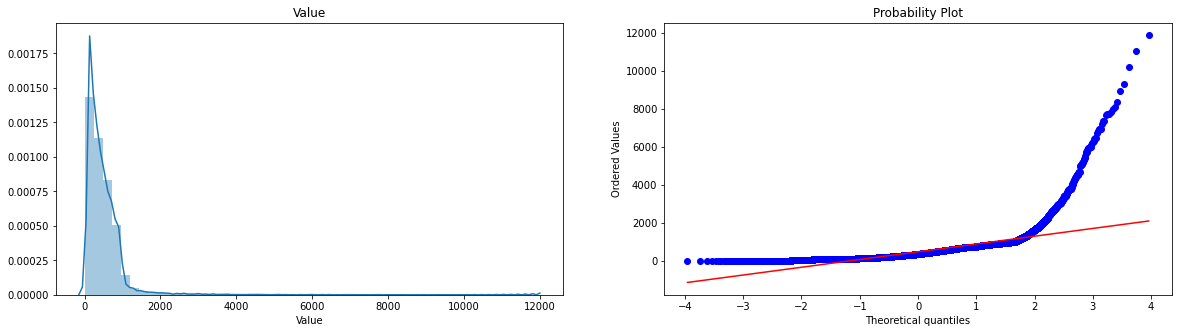

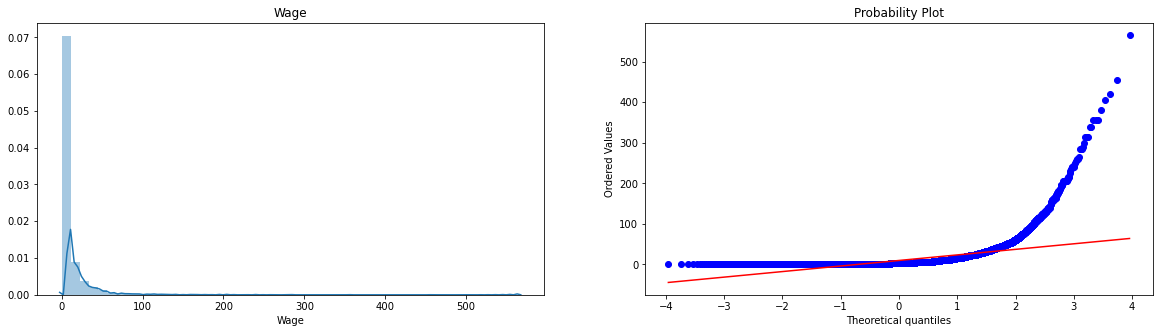

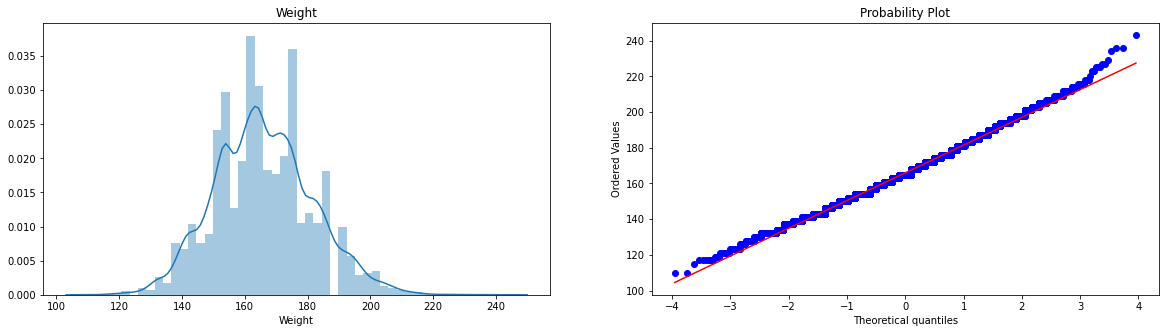

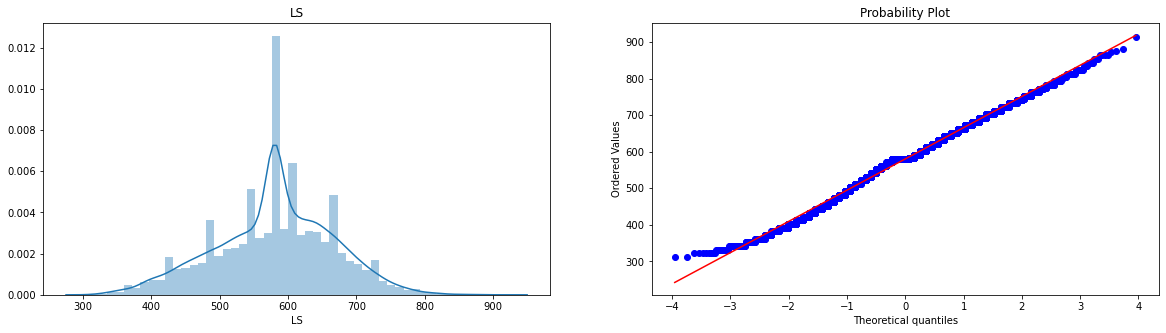

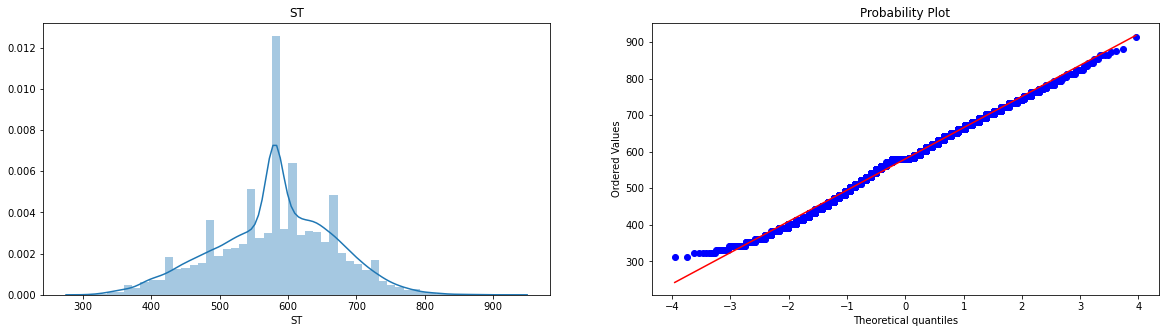

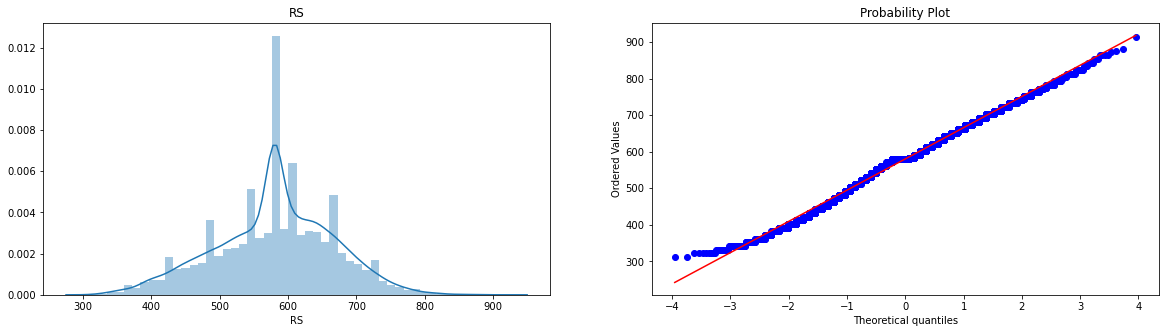

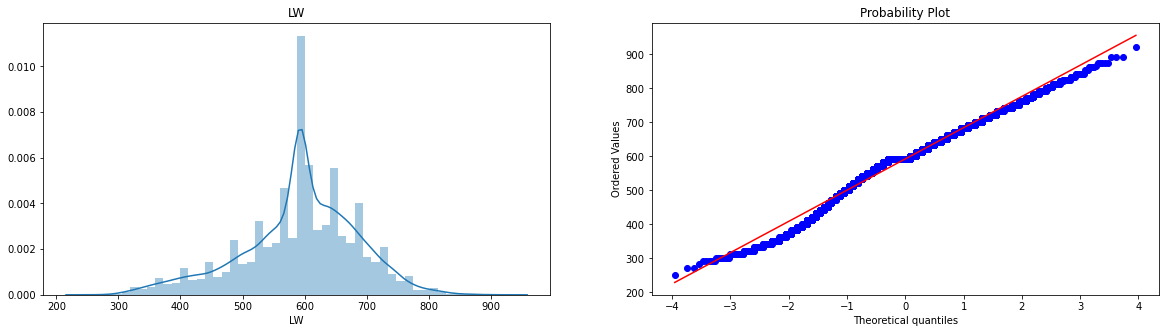

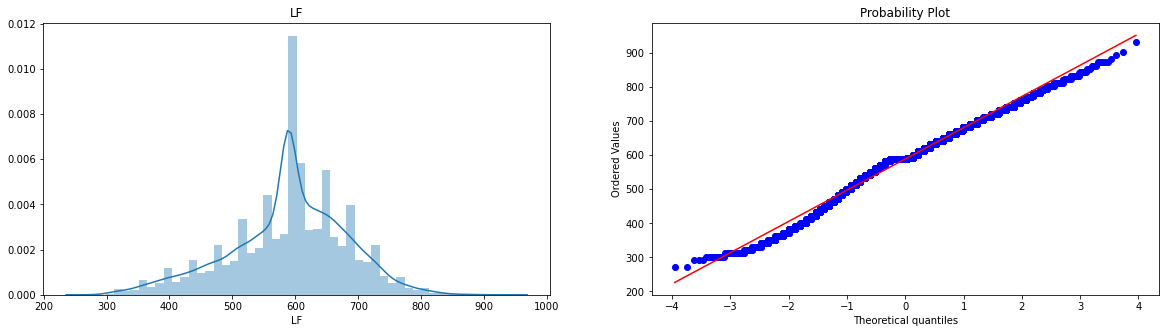

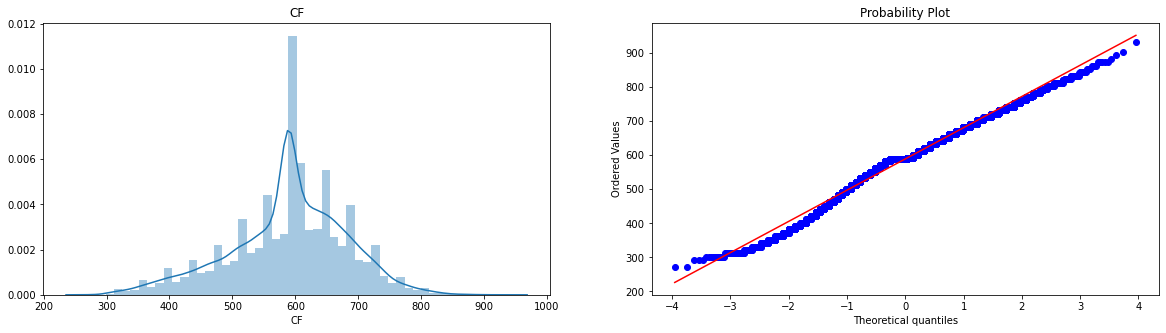

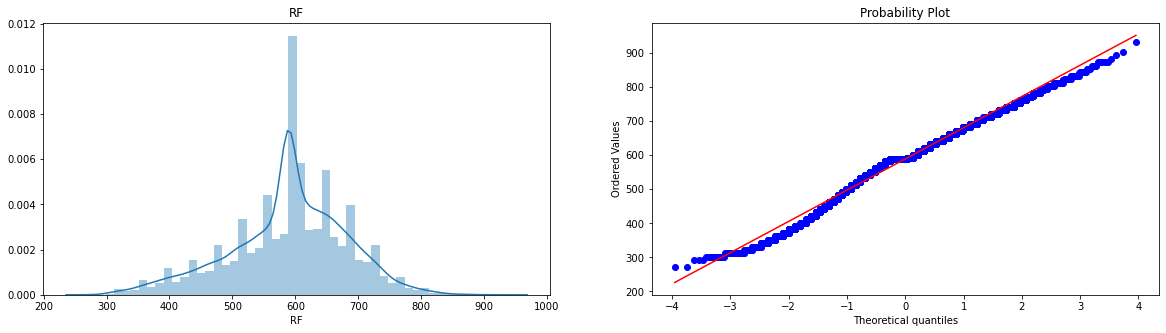

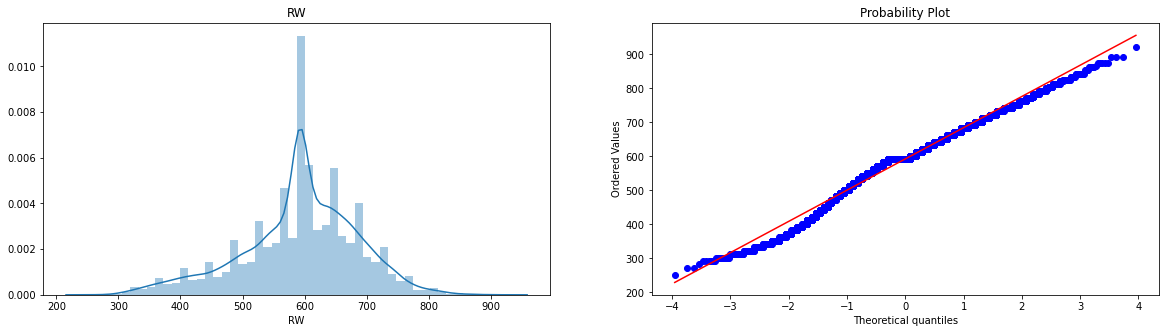

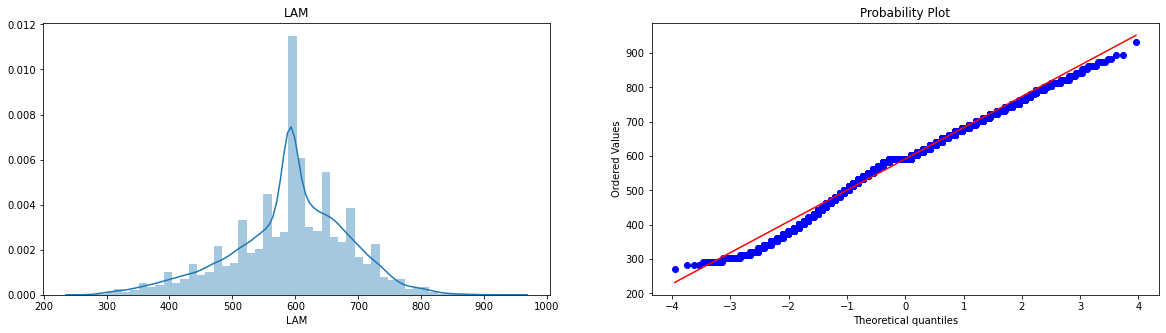

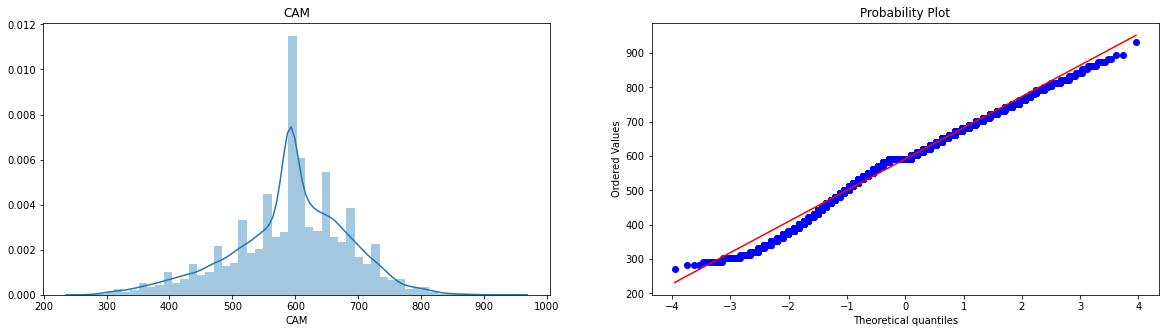

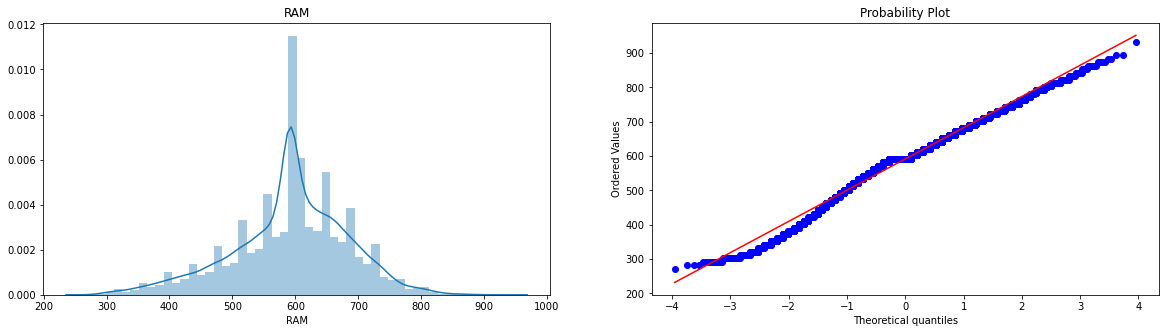

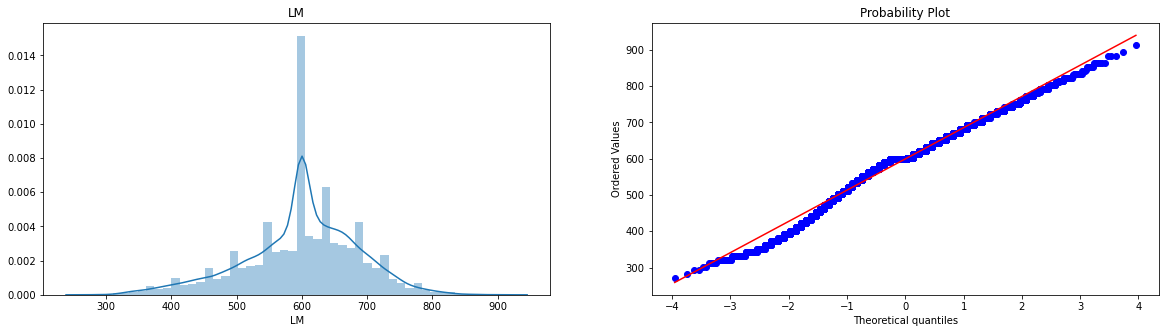

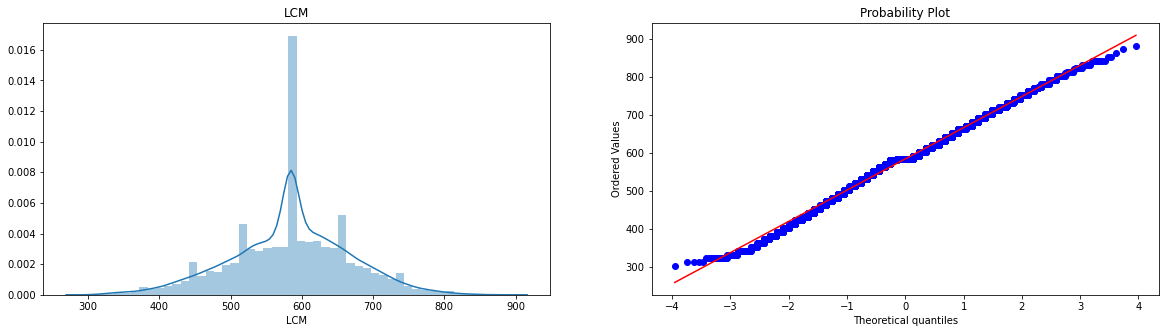

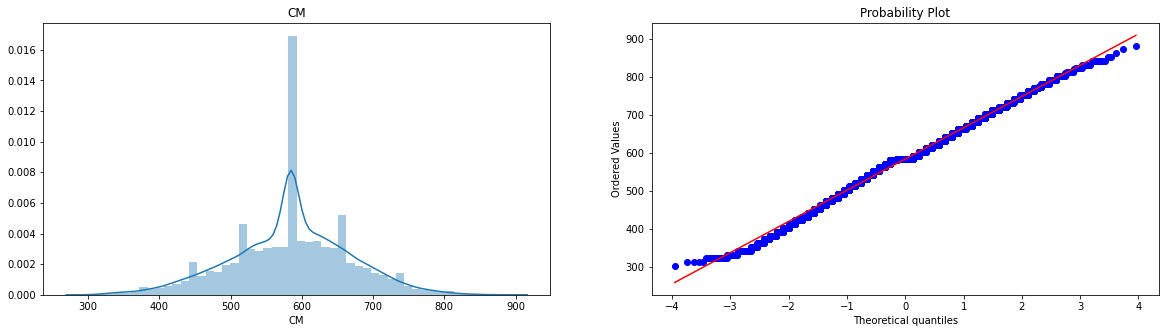

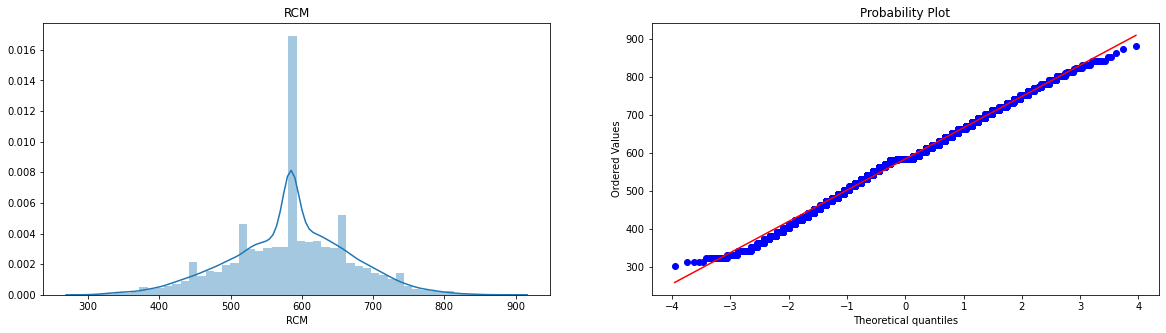

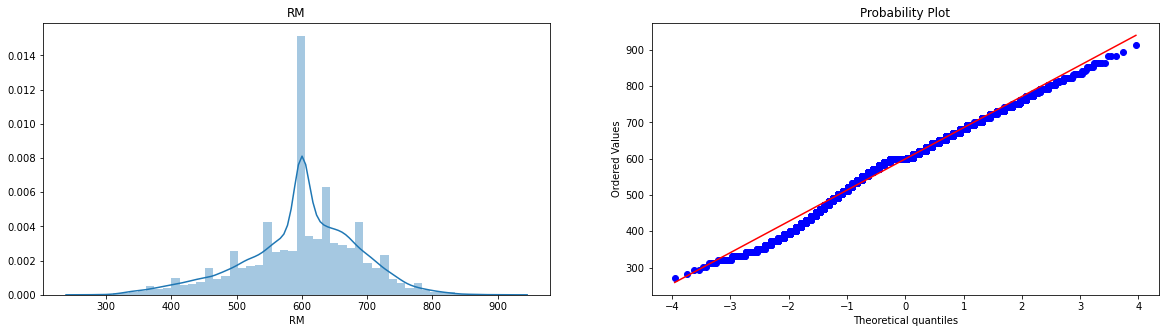

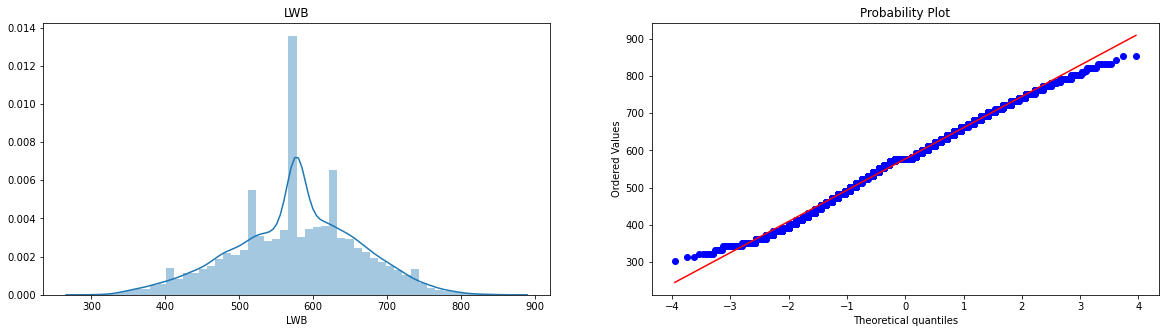

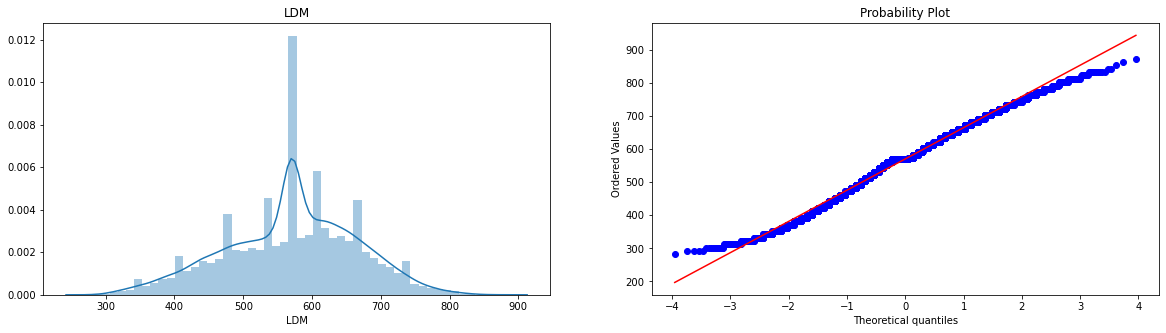

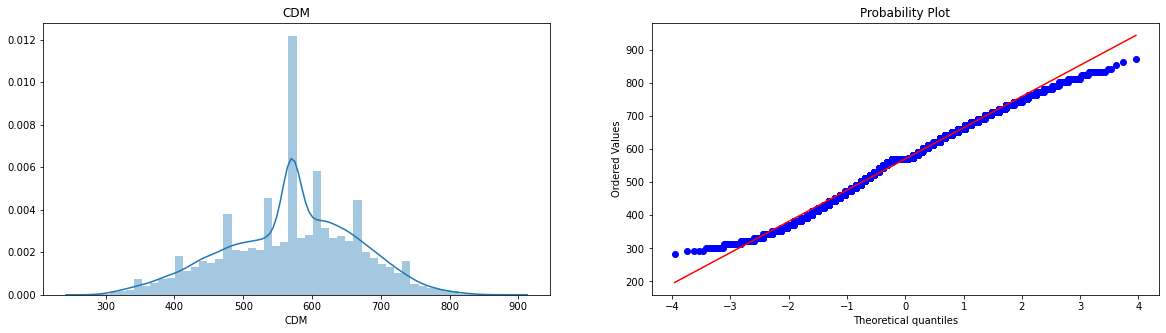

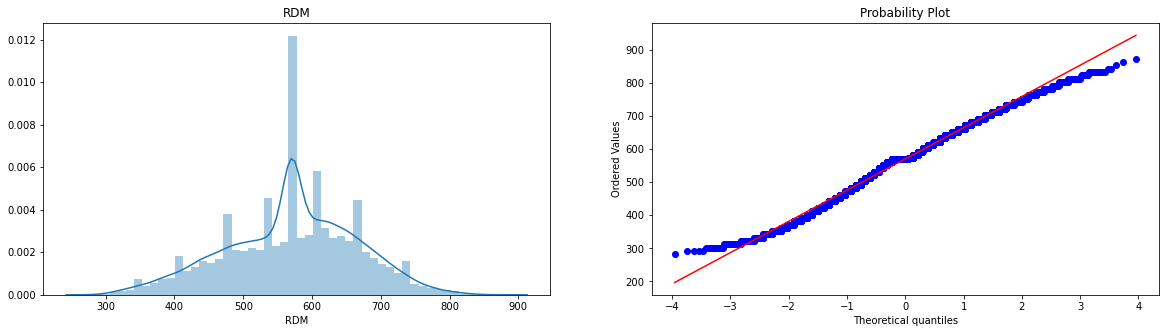

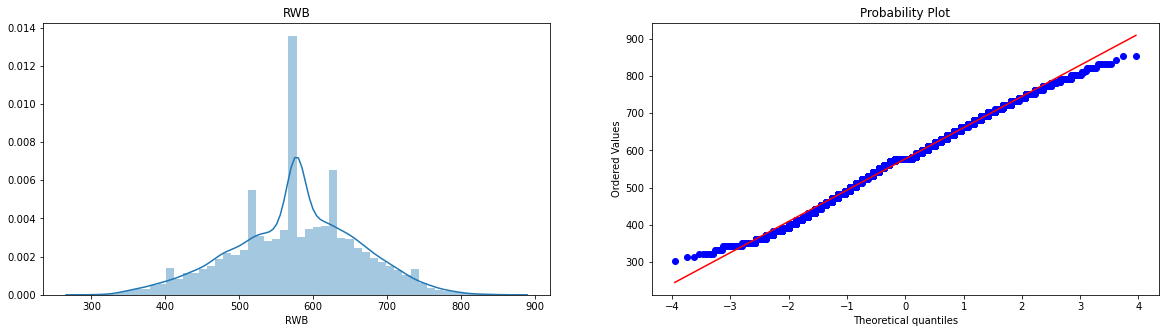

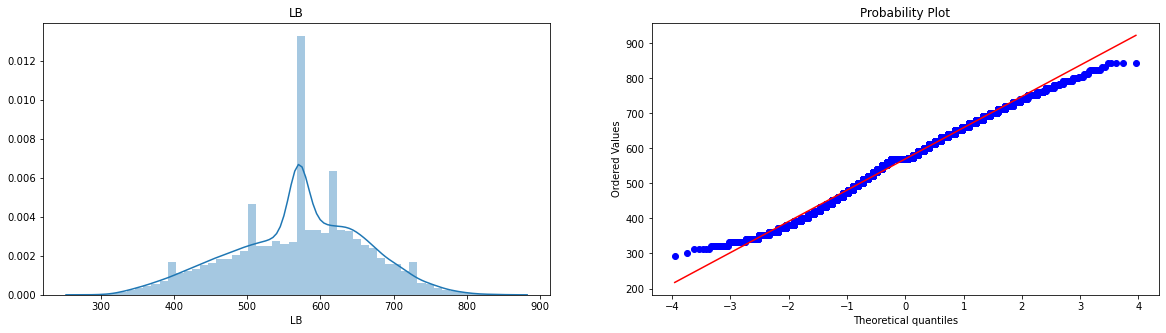

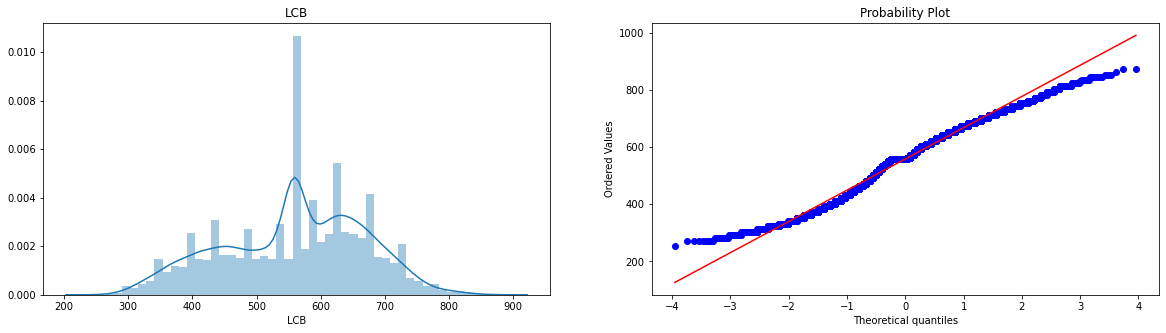

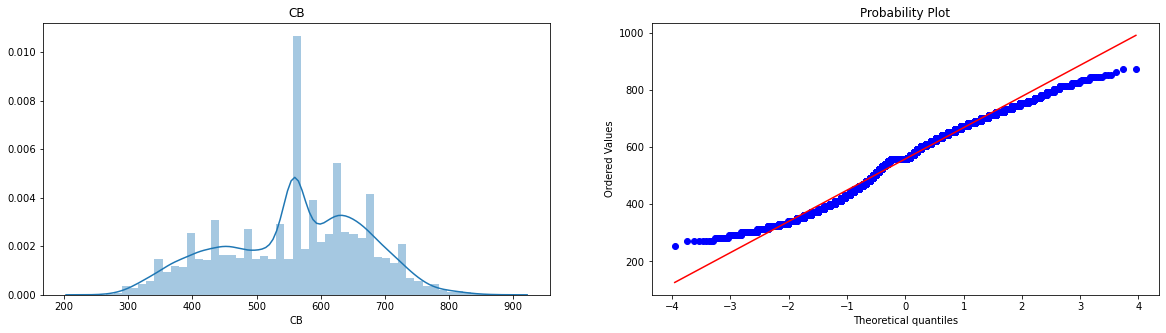

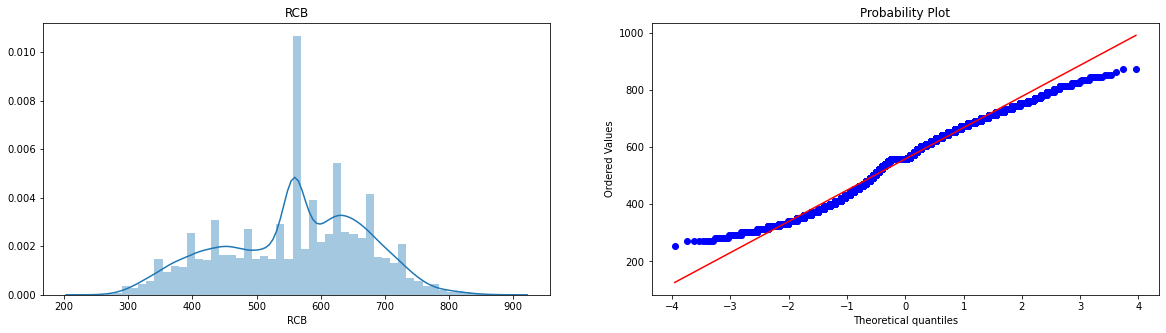

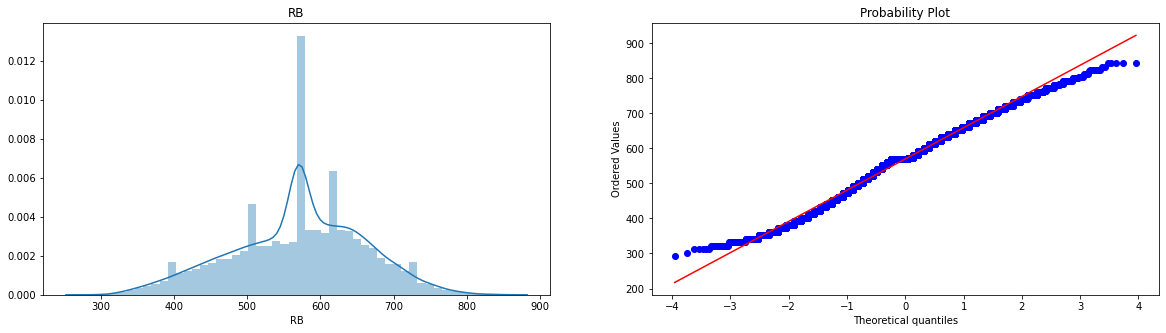

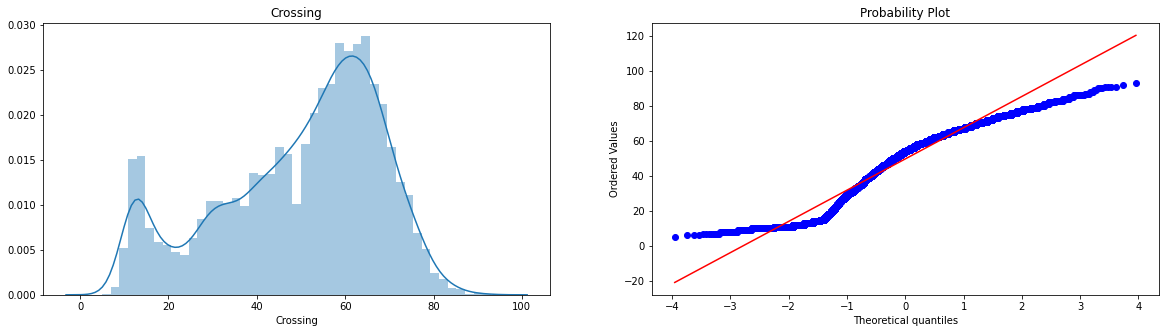

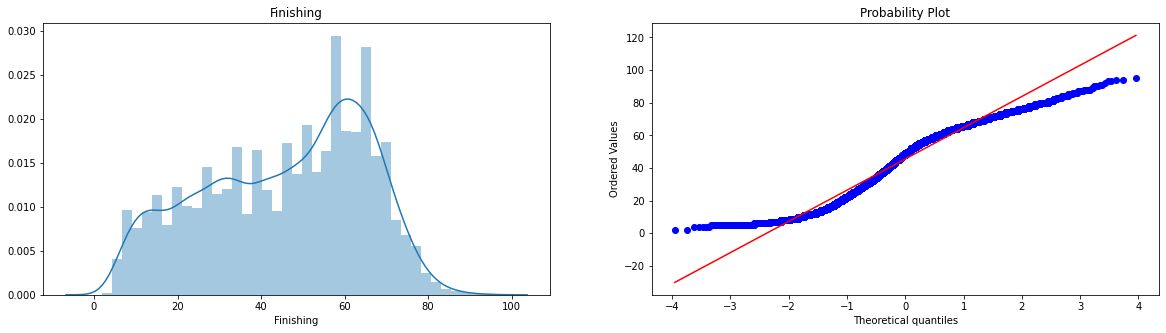

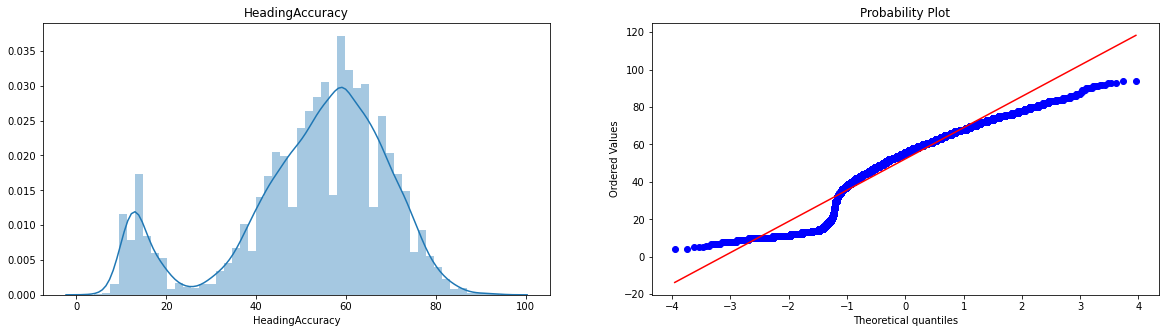

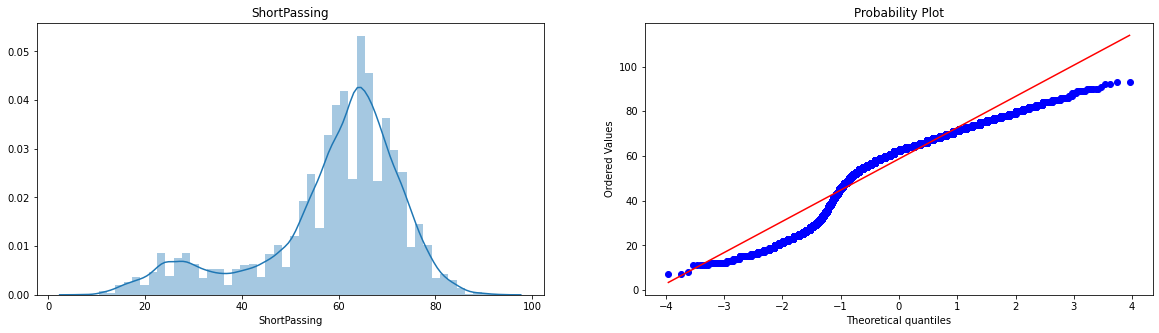

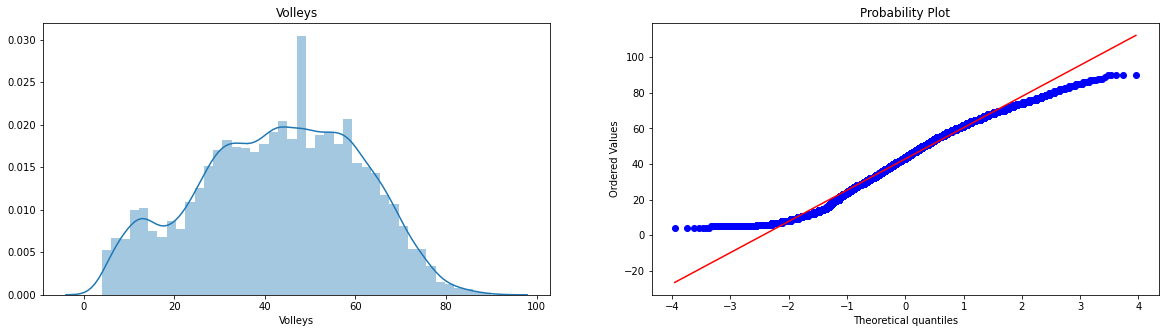

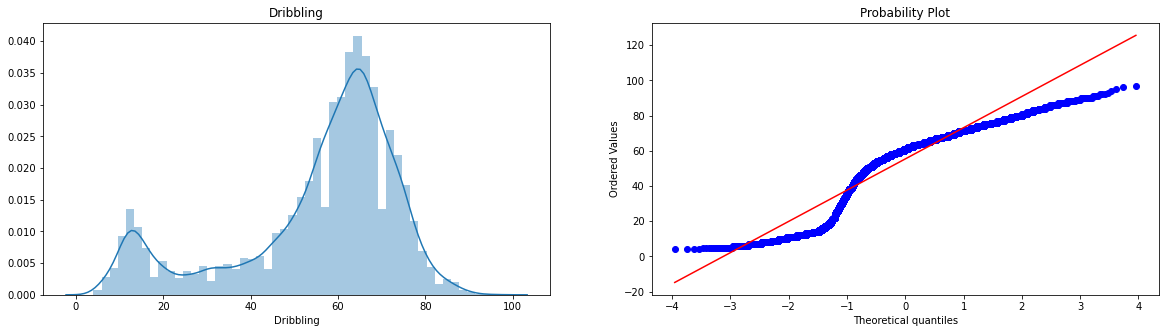

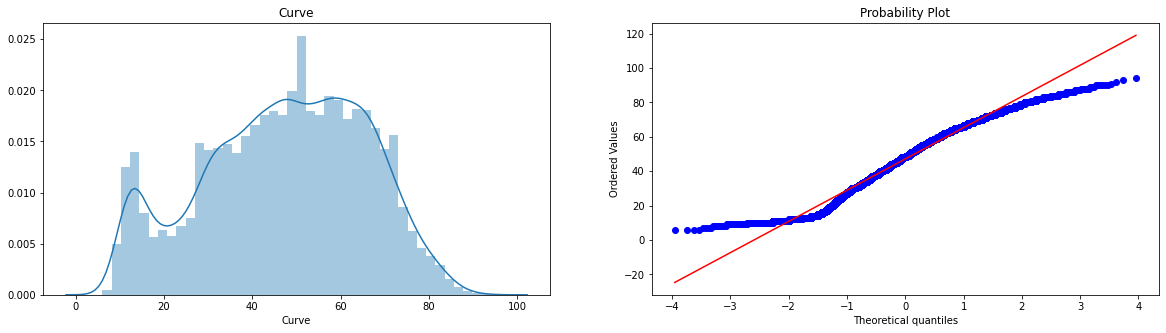

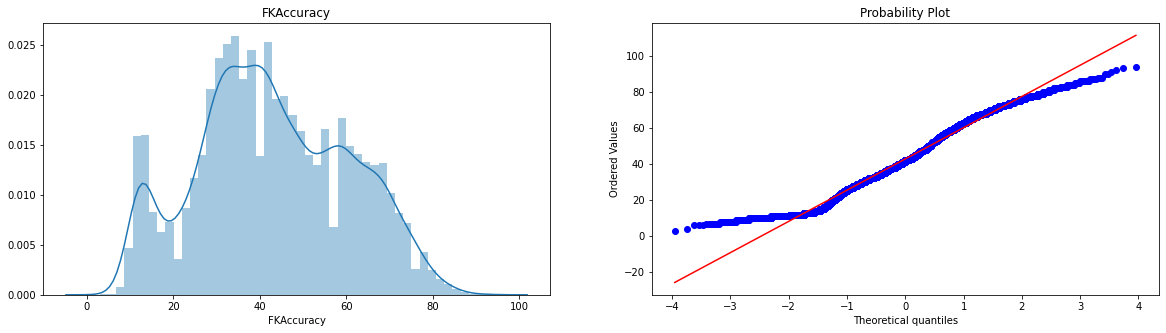

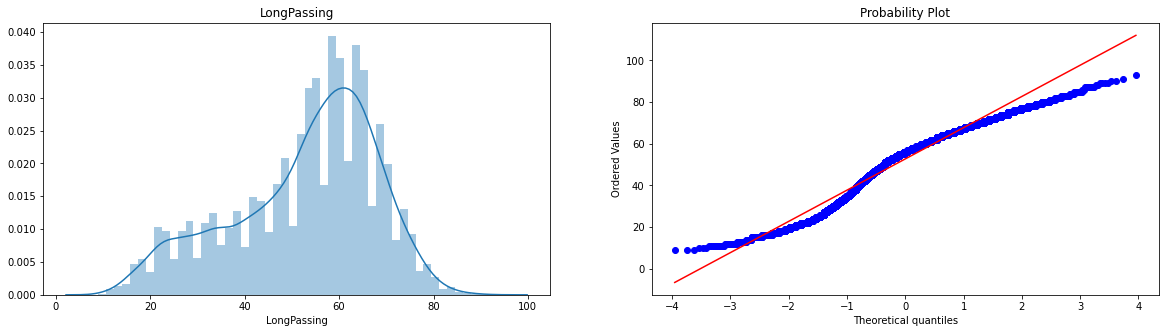

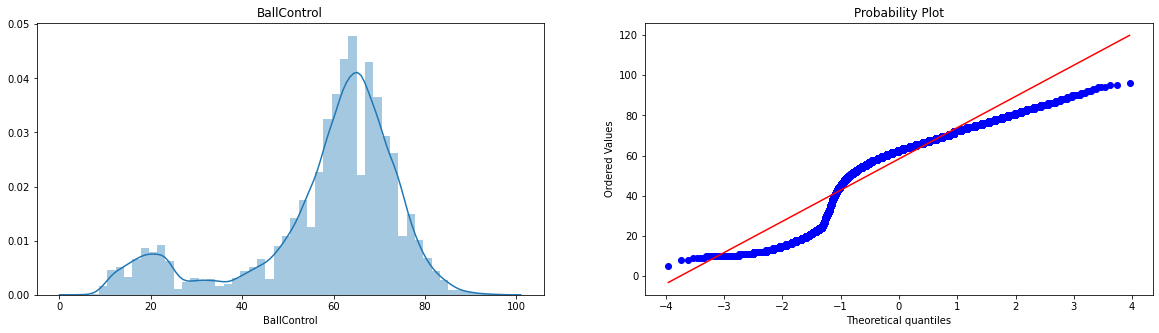

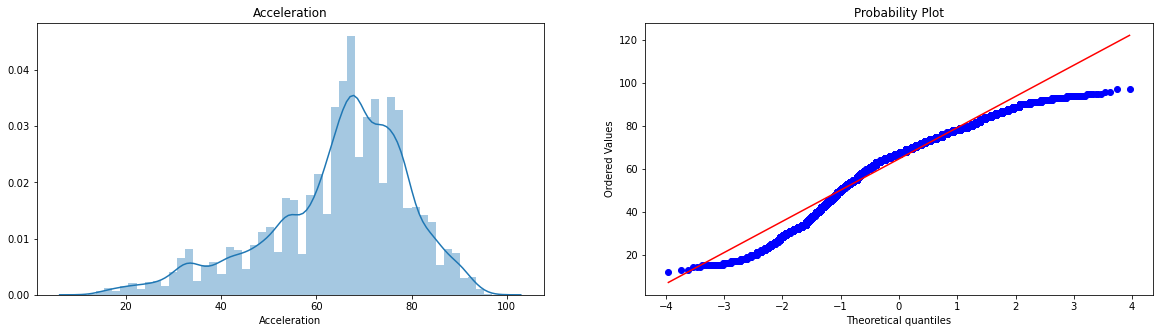

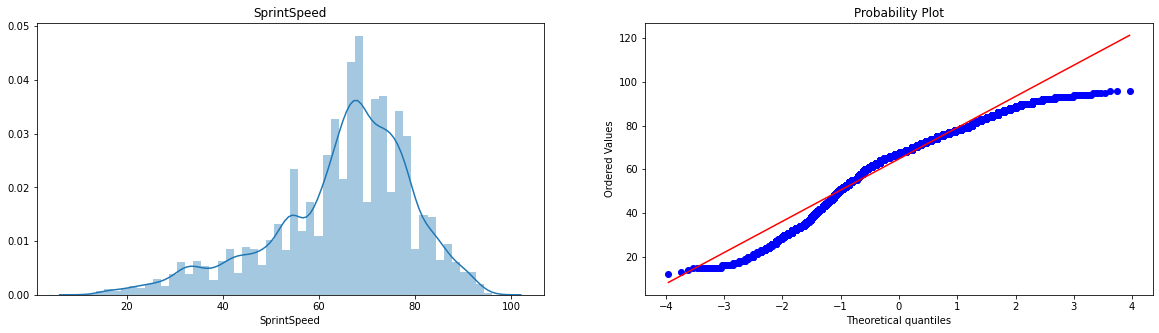

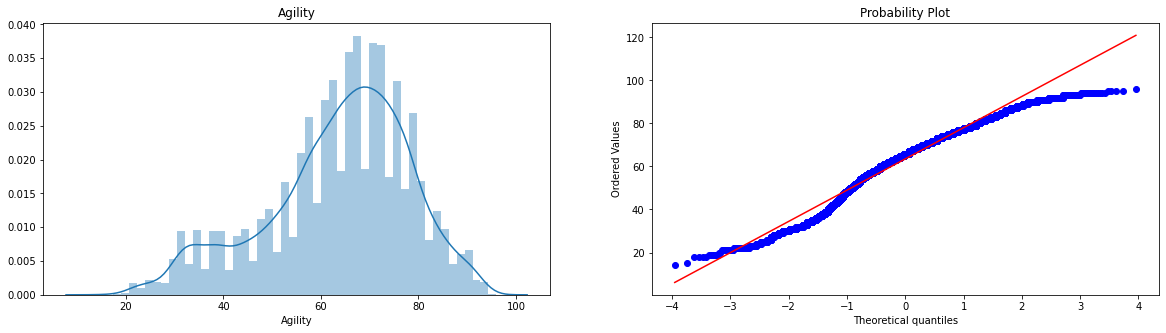

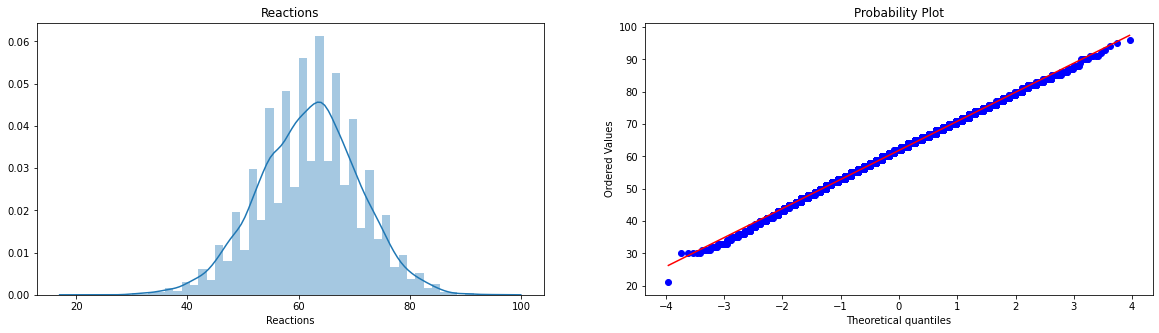

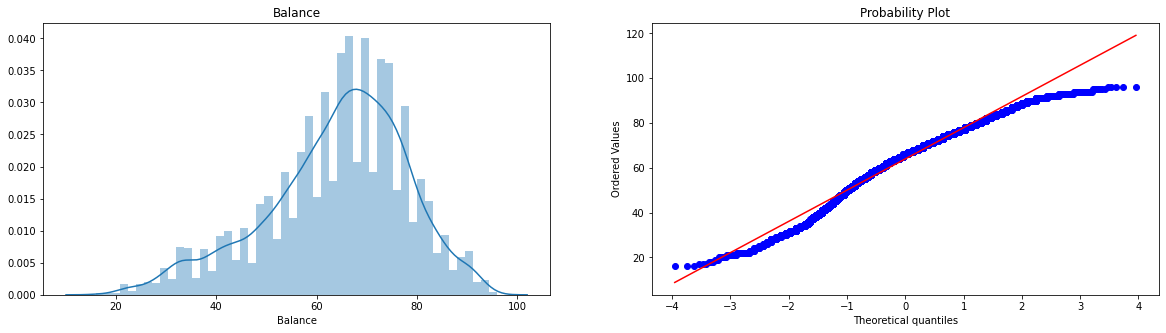

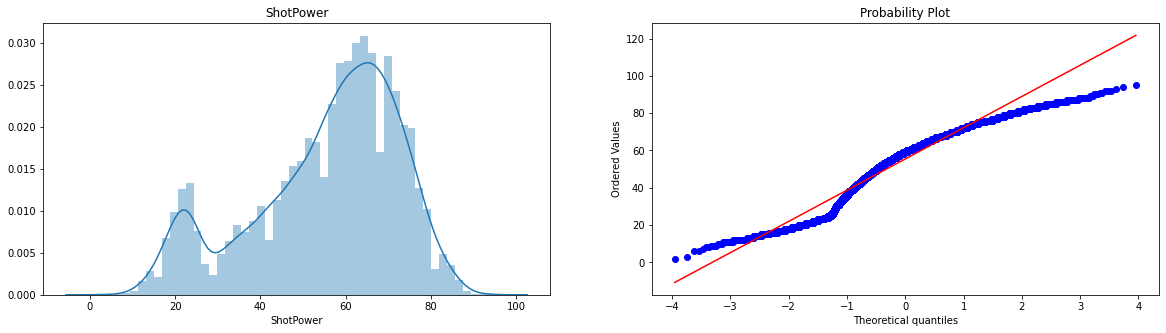

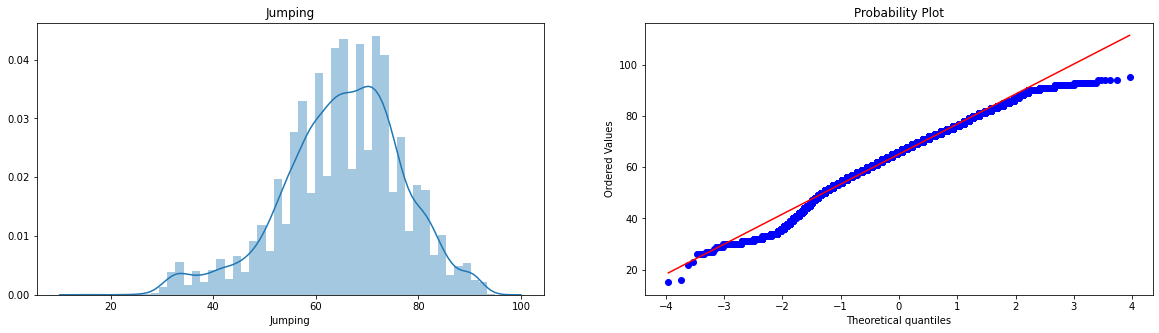

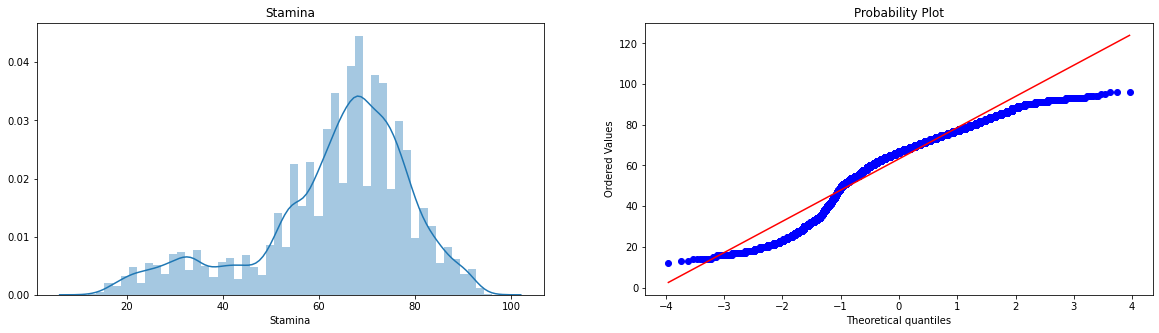

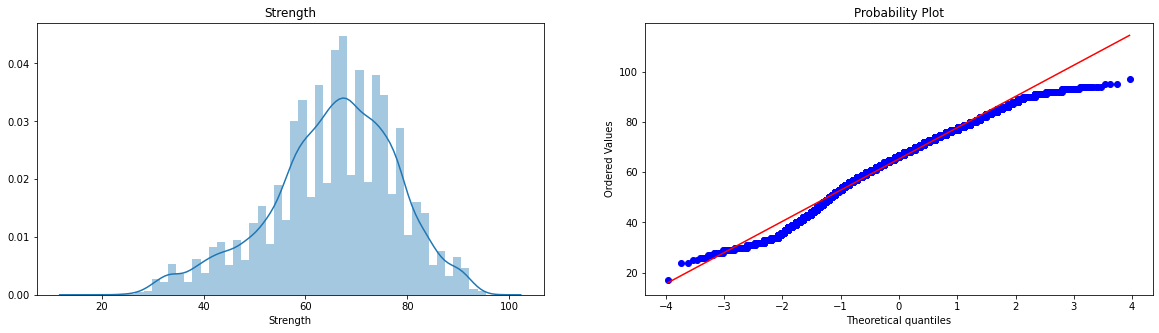

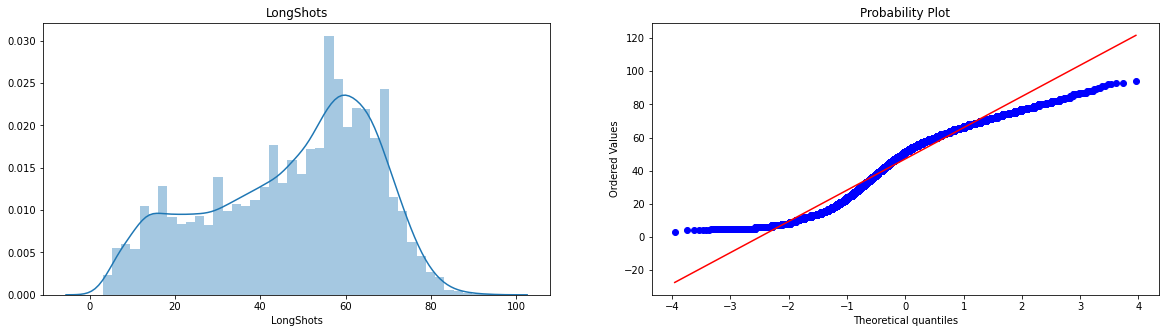

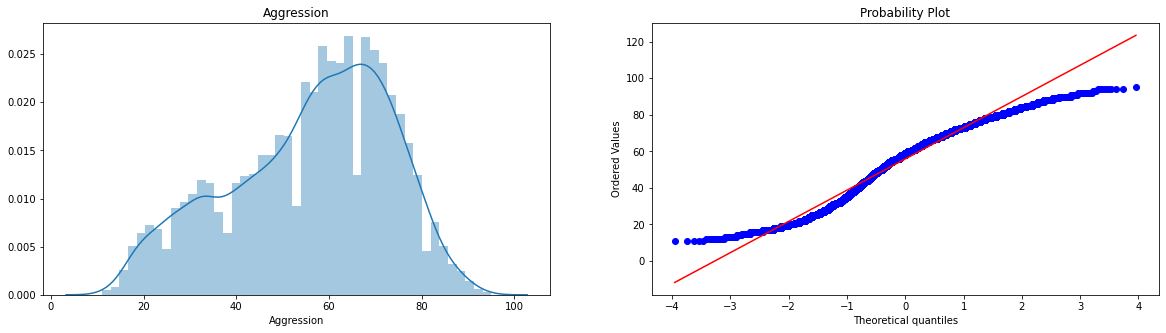

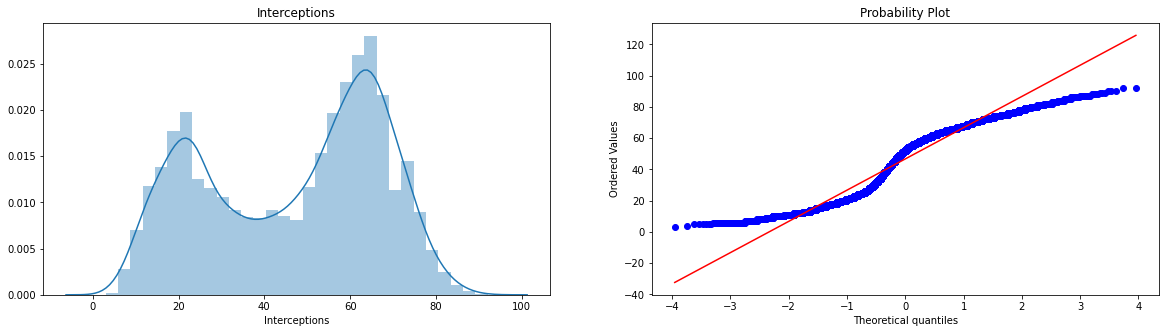

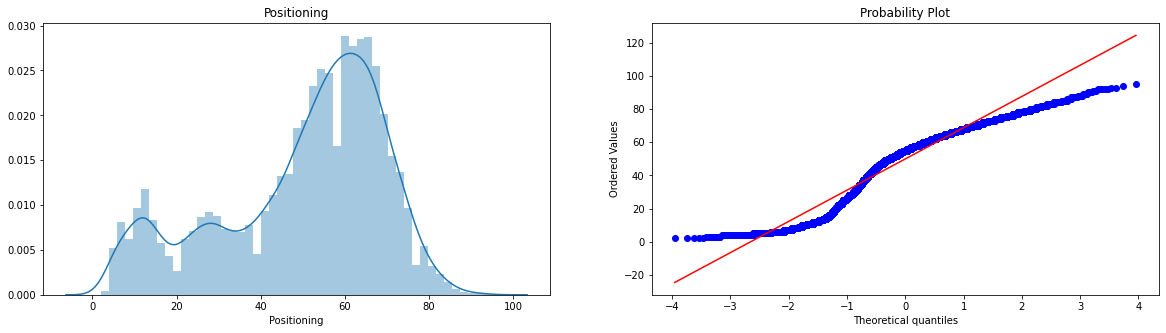

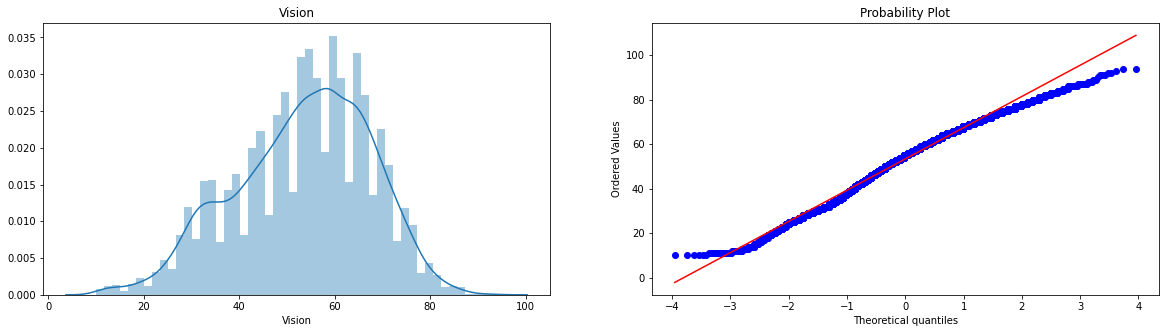

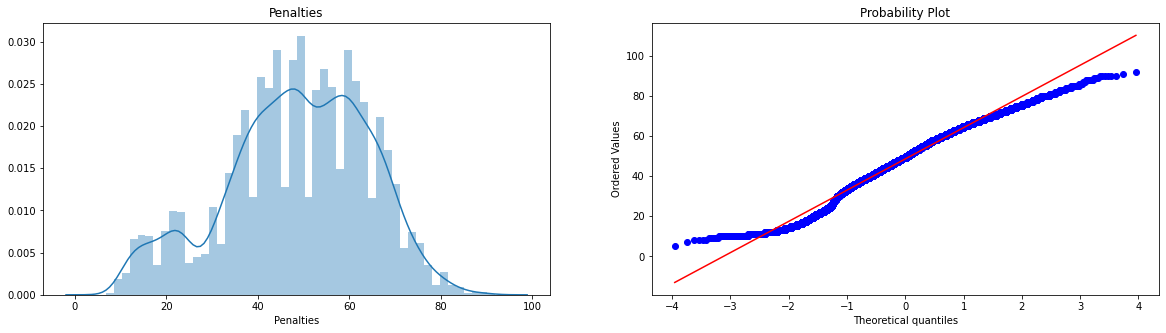

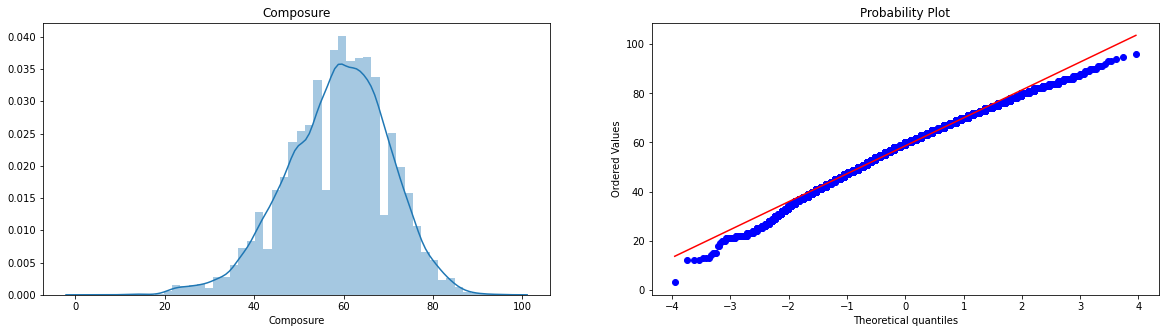

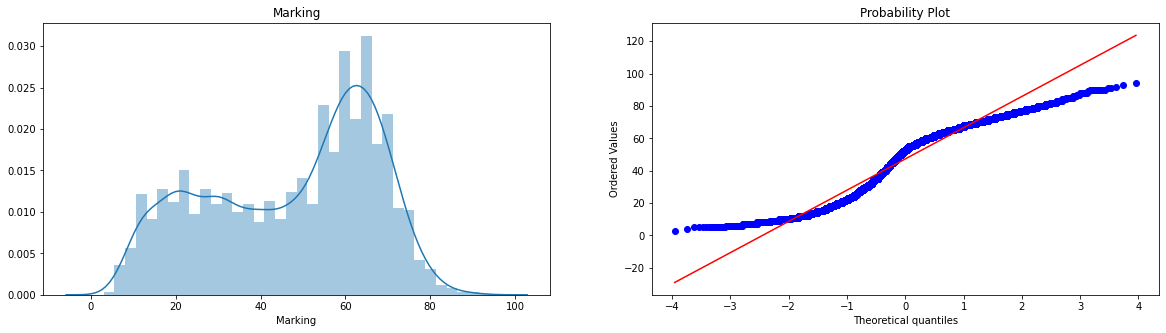

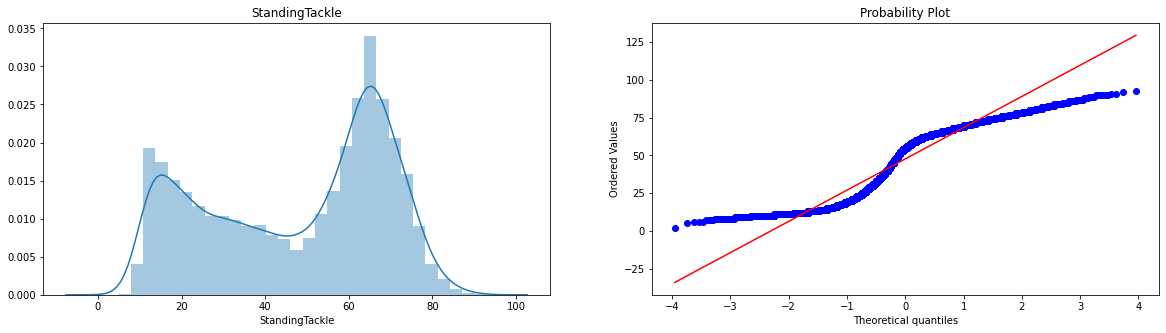

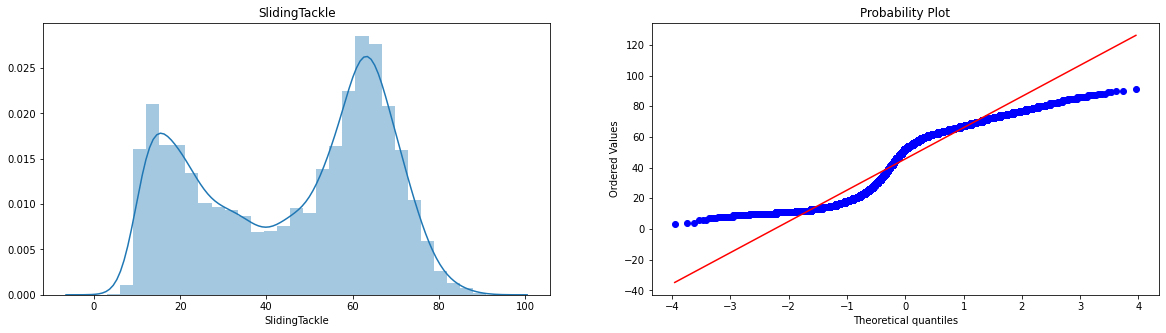

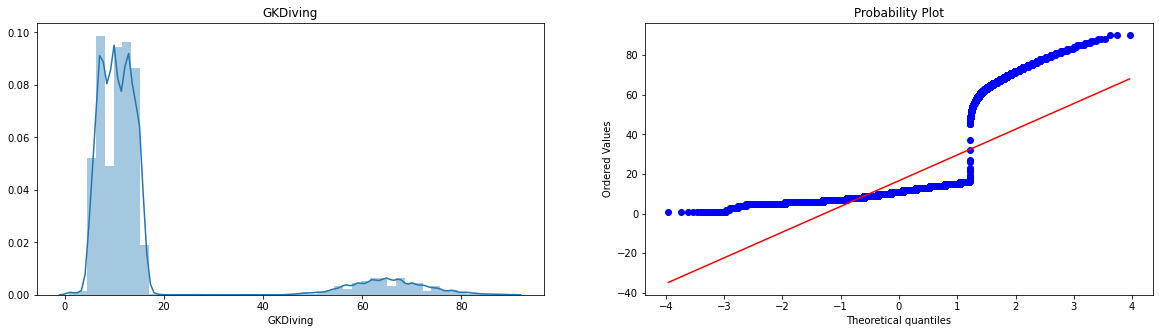

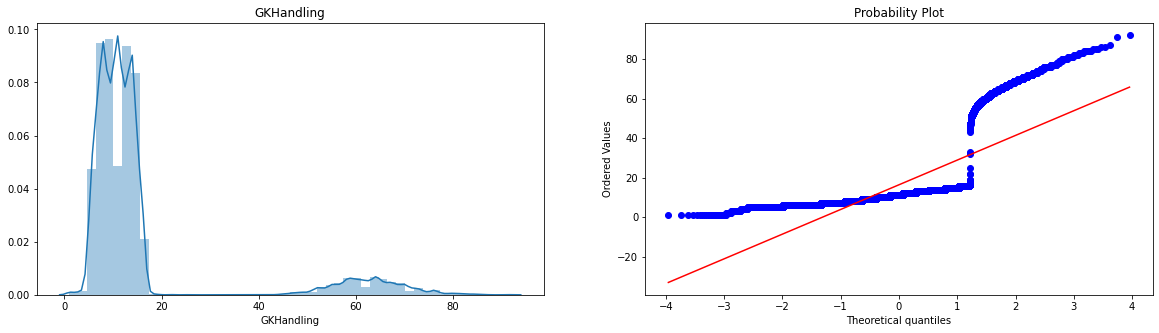

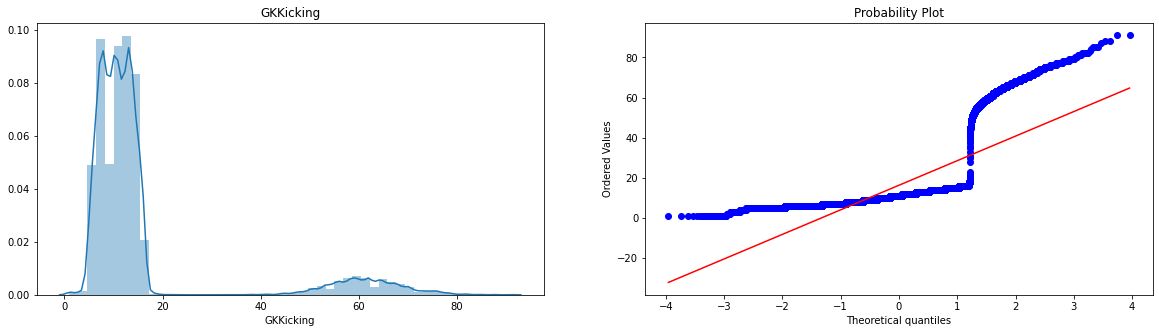

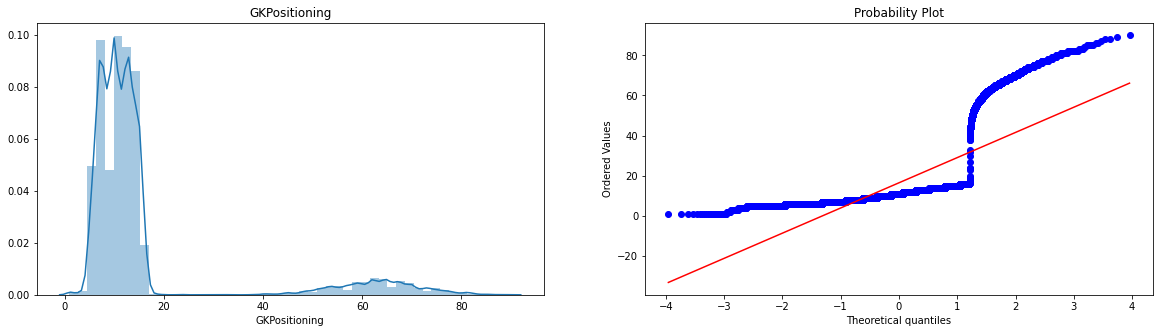

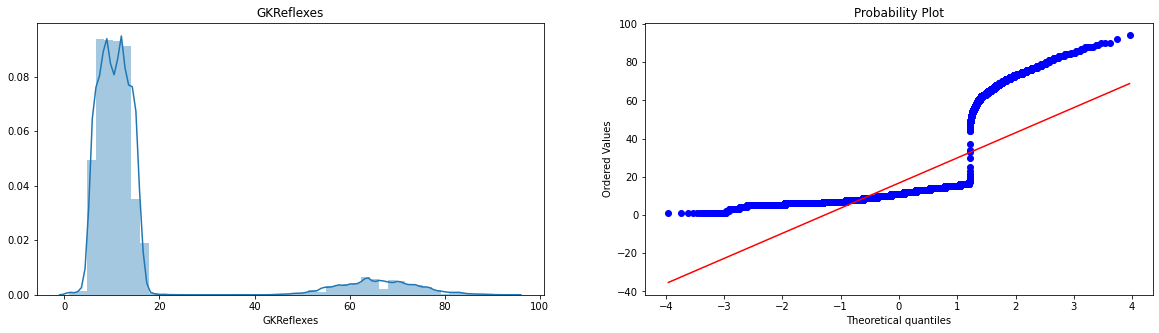

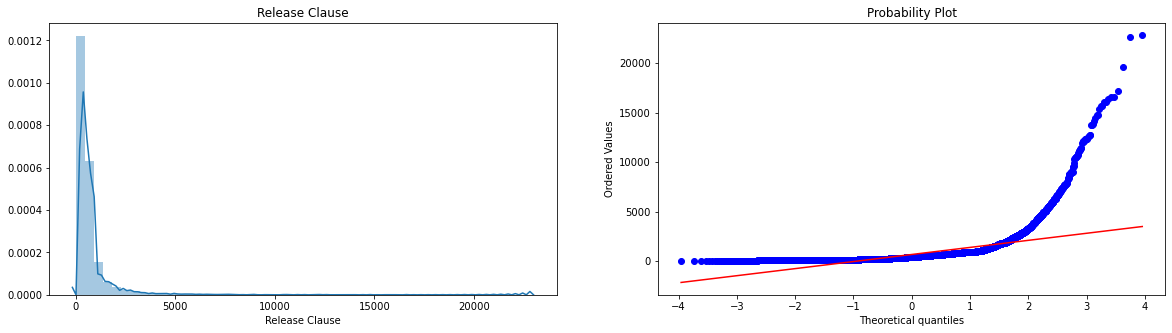

In [87]:
for i in df[df_all_num].drop(["Work Rate",'Weak Foot',"Skill Moves","International Reputation","Jersey Number","Height"],axis=1):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.distplot(df[i])
    plt.title(i)
    plt.subplot(1,2,2)
    st.probplot(df[i],dist="norm",plot=plt)
    plt.show()
    
    

In [88]:
non_gau=["Release Clause","GKReflexes","GKPositioning","GKKicking","GKHandling","GKDiving","SlidingTackle","StandingTackle","Marking","Penalties","Positioning","Interceptions","LongShots","Stamina","ShotPower","BallControl","Dribbling","ShortPassing","HeadingAccuracy","Finishing","Wage","Value"]

In [89]:
for i in non_gau:
    df[i]=np.log(df[i]+1)

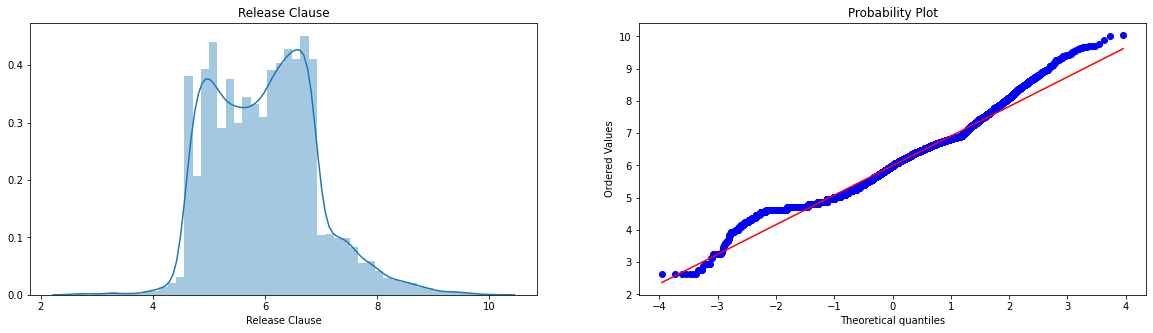

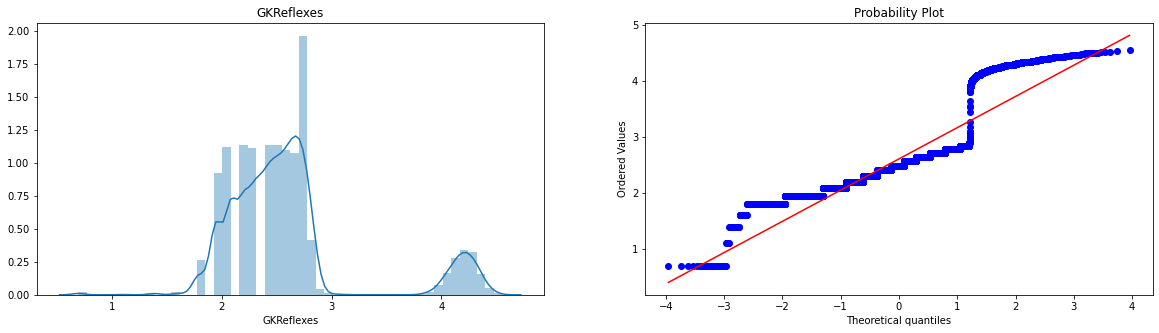

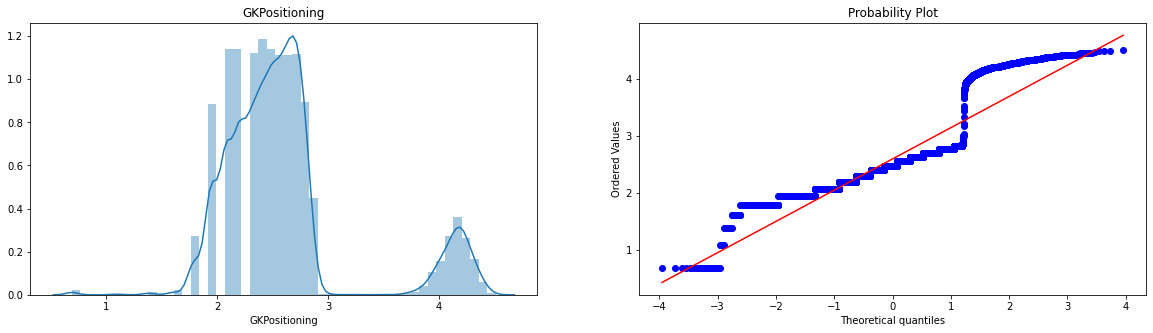

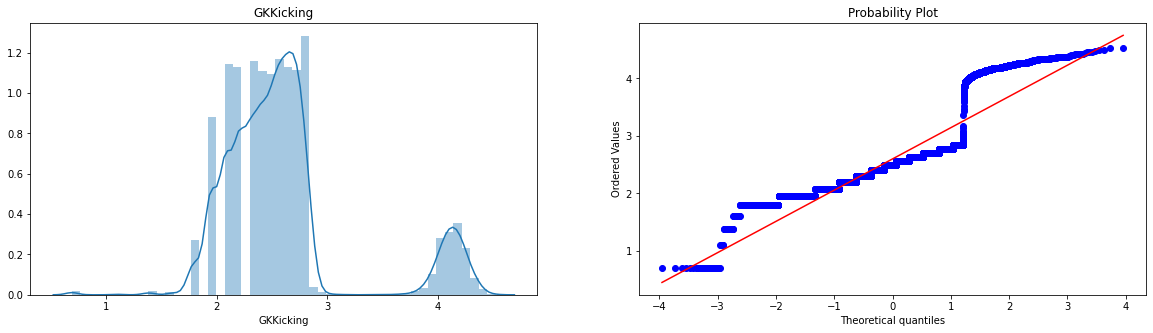

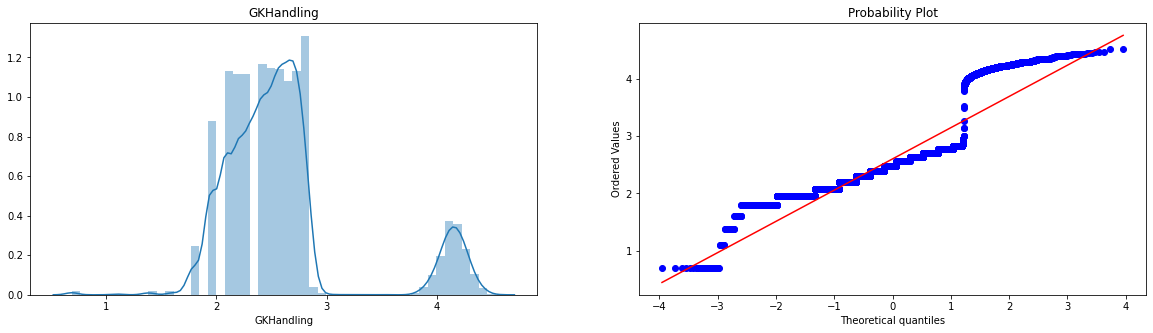

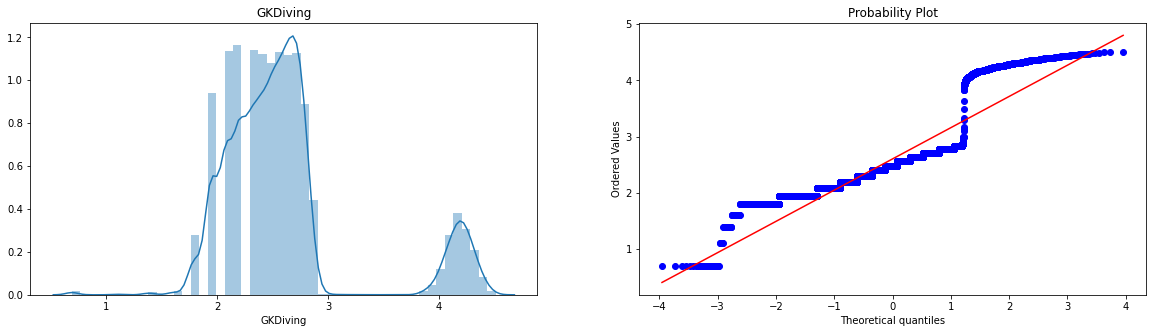

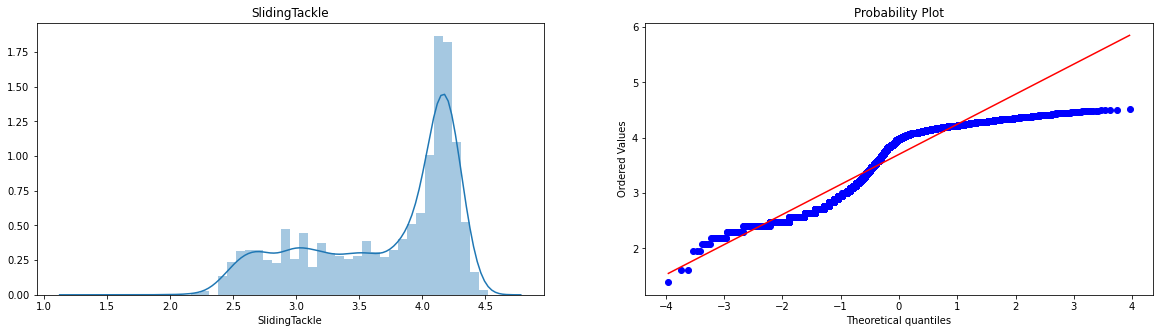

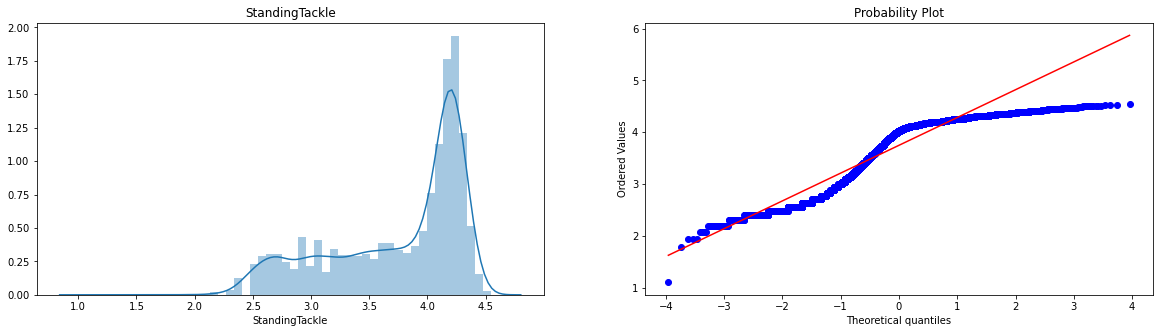

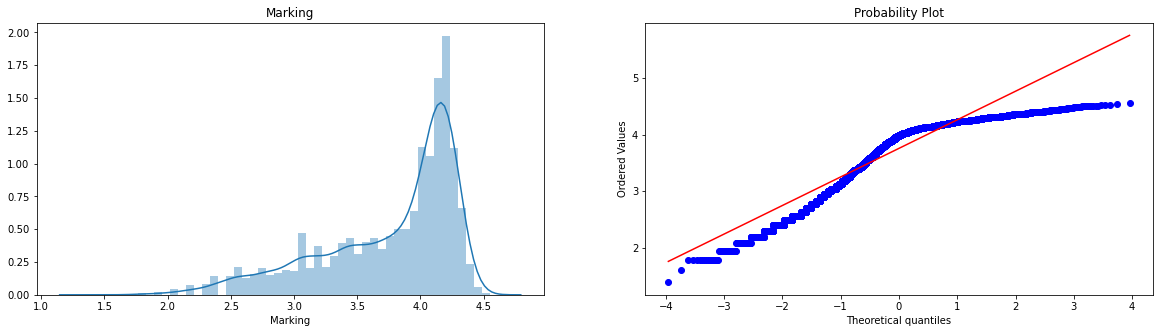

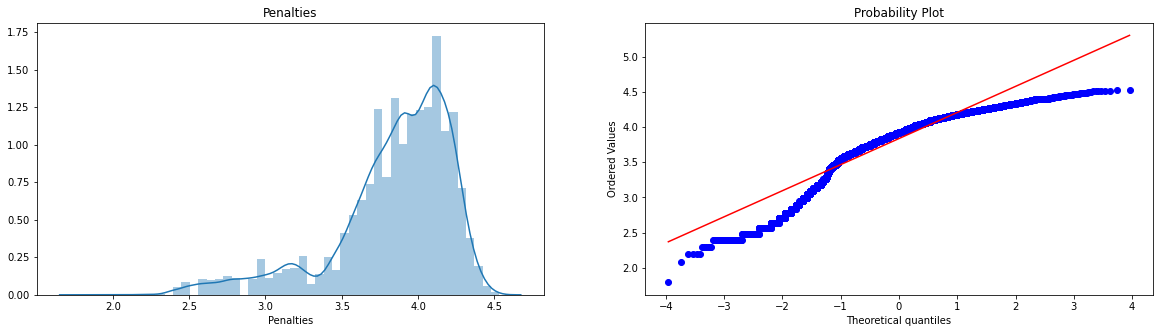

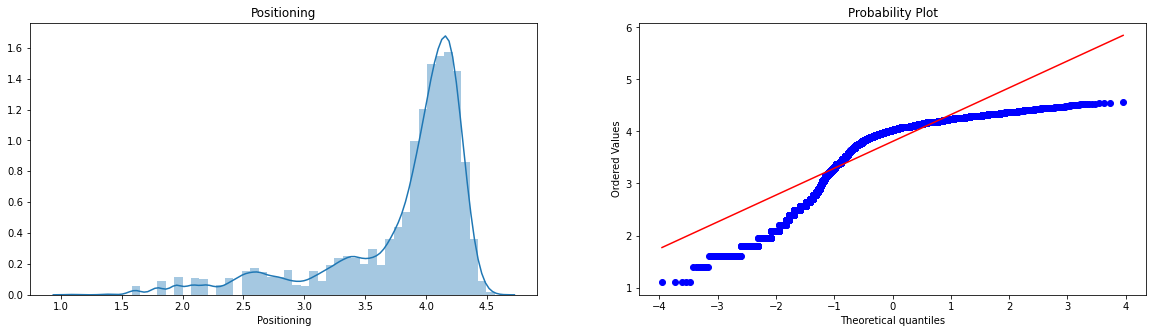

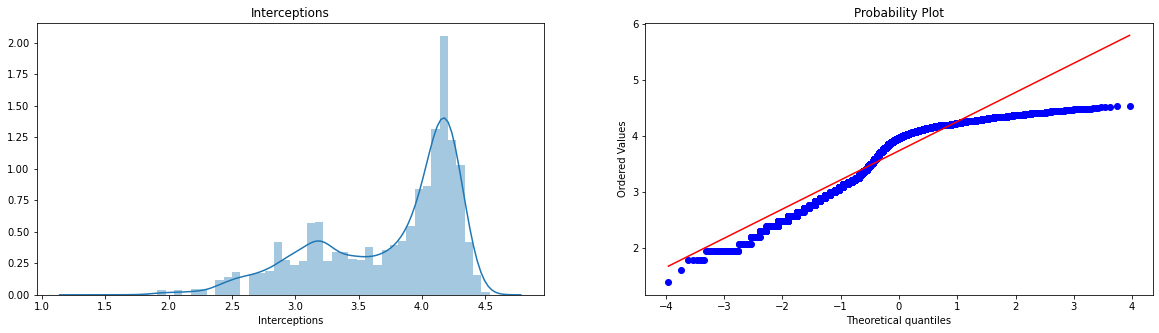

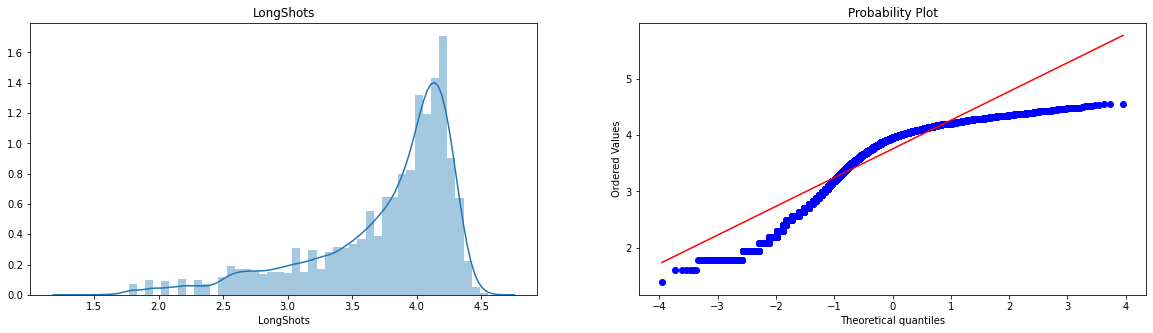

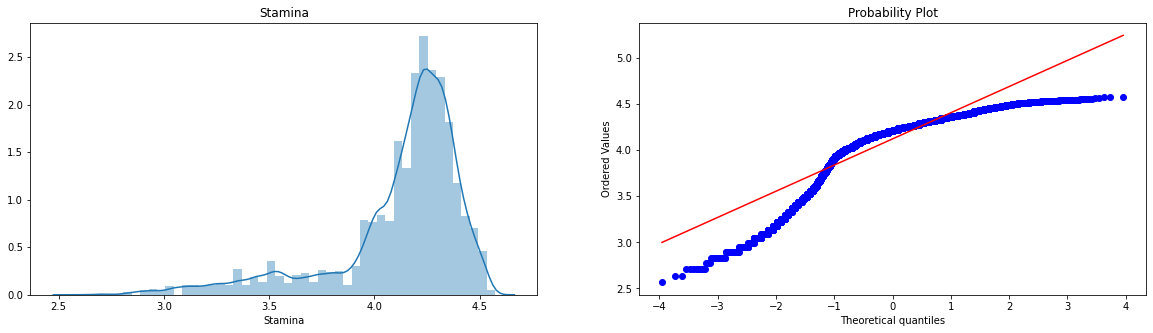

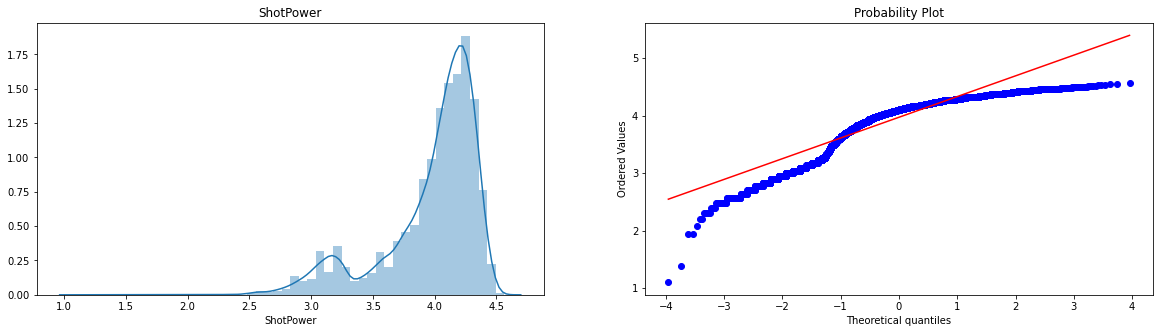

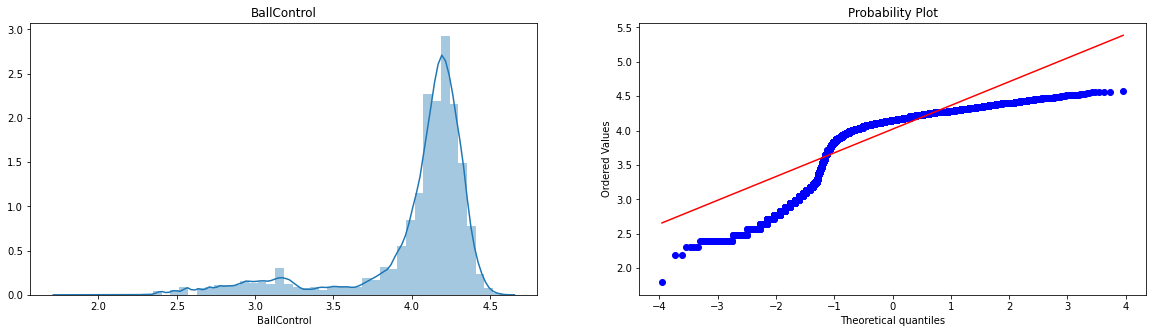

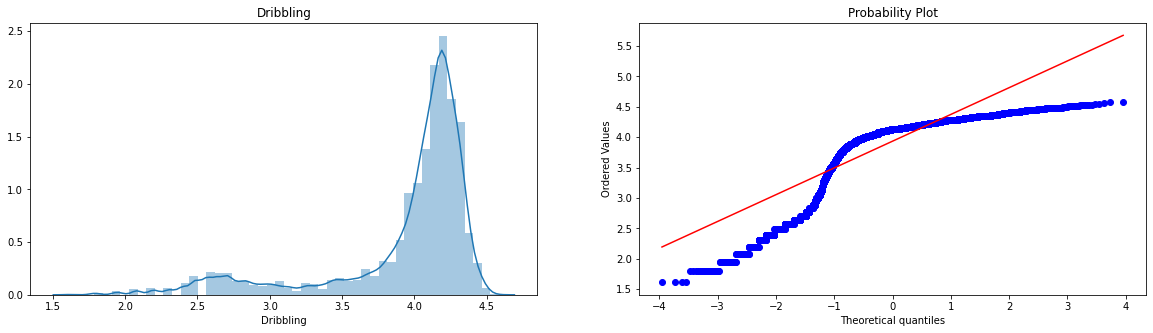

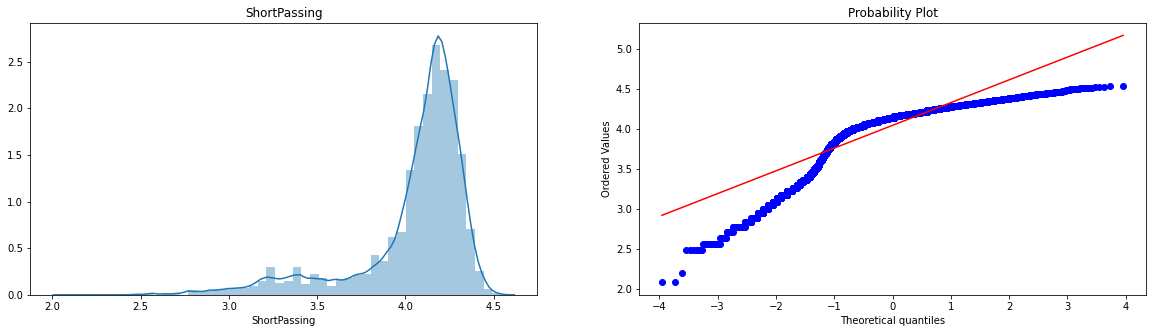

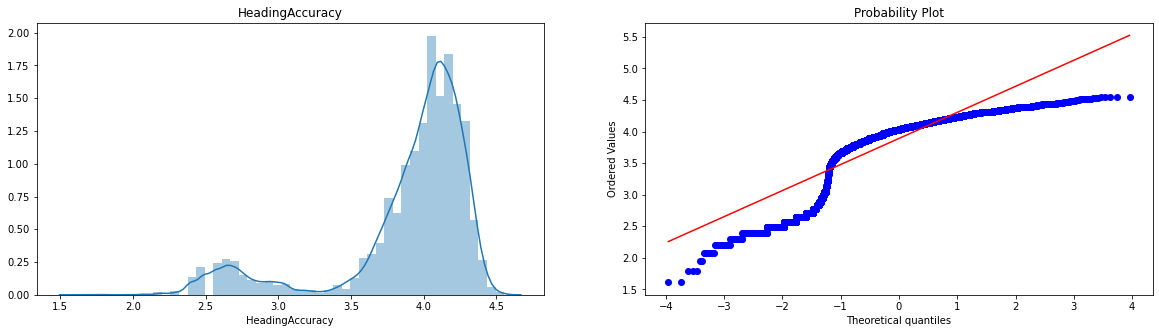

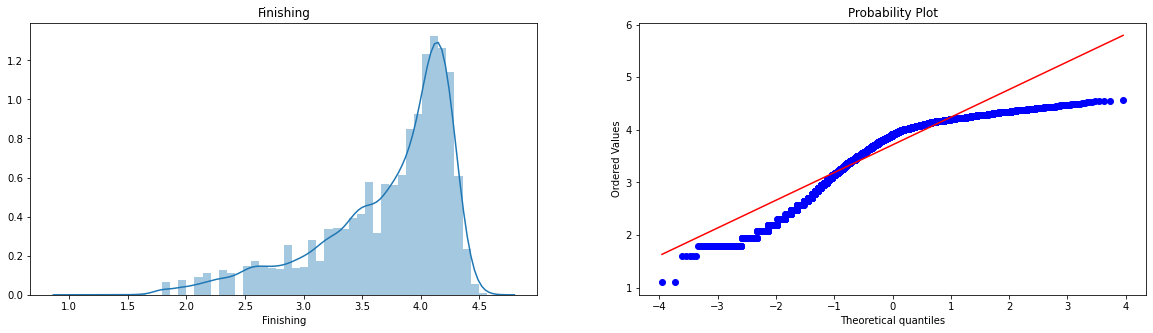

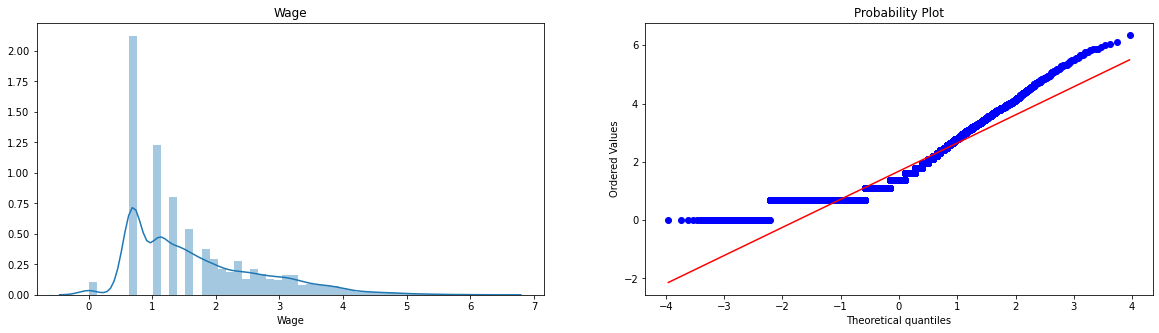

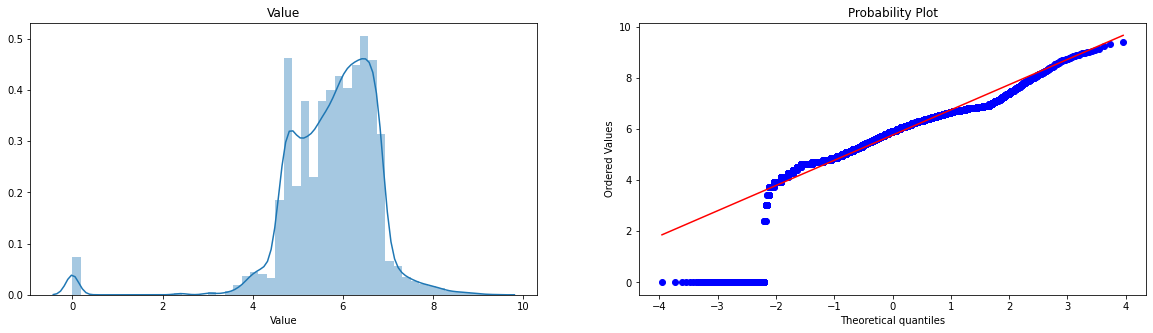

In [90]:
for i in non_gau:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.distplot(df[i])
    plt.title(i)
    plt.subplot(1,2,2)
    st.probplot(df[i],dist="norm",plot=plt)
    plt.show()
    

# Handling Categorical Variables

In [91]:
df_cat=[f for f in df.columns if df[f].dtype=="O"]
df[df_cat].head()

,Name,Nationality,Club,Preferred Foot,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until
0,L. Messi,Argentina,FC Barcelona,Left,Messi,Yes,RF,2004,NaN,2021
1,Cristiano Ronaldo,Portugal,Juventus,Right,C. Ronaldo,Yes,ST,2018,NaN,2022
2,Neymar Jr,Brazil,Paris Saint-Germain,Right,Neymar,Yes,LW,2017,NaN,2022
3,De Gea,Spain,Manchester United,Right,Lean,Yes,GK,2011,NaN,2020
4,K. De Bruyne,Belgium,Manchester City,Right,Normal,Yes,RCM,2015,NaN,2023


In [92]:
for i in df_cat:
    print(i,":-",len(df[i].unique())," labels")

Name :- 17194  labels
Nationality :- 164  labels
Club :- 652  labels
Preferred Foot :- 3  labels
Body Type :- 11  labels
Real Face :- 3  labels
Position :- 28  labels
Joined :- 22  labels
Loaned From :- 342  labels
Contract Valid Until :- 9  labels


In [93]:
df[df_cat].isna().sum()

Name                        0
Nationality                 0
Club                      241
Preferred Foot             48
Body Type                  48
Real Face                  48
Position                   60
Joined                      0
Loaned From             16943
Contract Valid Until        0
dtype: int64

In [94]:
Random_sample('Club')

In [95]:
df['Preferred Foot'].unique()

array(['Left', 'Right', nan], dtype=object)

In [96]:
mode_nan=['Preferred Foot','Body Type','Real Face']
for i in mode_nan:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [97]:
df['Loaned From'].fillna("Missing",inplace=True)

In [98]:
Random_sample('Position')

In [99]:
###This encoding not work because of most of values are same
df.groupby(['Nationality'])['Release Clause'].mean().sort_values(ascending=True)

Nationality
Namibia                 4.971913
Niger                   5.047598
Mauritius               5.081404
Liberia                 5.081404
Puerto Rico             5.111988
Latvia                  5.179554
Thailand                5.265275
Kuwait                  5.303305
Hong Kong               5.329135
Comoros                 5.464597
Panama                  5.489747
Uganda                  5.497930
Azerbaijan              5.564876
Korea DPR               5.565077
China PR                5.589287
Zambia                  5.593479
Northern Ireland        5.597658
St Lucia                5.641907
Republic of Ireland     5.667742
Fiji                    5.673323
Japan                   5.674489
St Kitts Nevis          5.678217
Luxembourg              5.680333
Belarus                 5.694040
Sudan                   5.694671
Faroe Islands           5.712779
Montserrat              5.717349
Armenia                 5.719566
Botswana                5.746203
Haiti                   5.74634

In [100]:
first_104=df['Nationality'].value_counts().head(104).to_dict()

In [101]:
nation_dict={k:i for i,k in enumerate(first_104,0)}
nation_dict

{'England': 0,
 'Germany': 1,
 'Spain': 2,
 'Argentina': 3,
 'France': 4,
 'Brazil': 5,
 'Italy': 6,
 'Colombia': 7,
 'Japan': 8,
 'Netherlands': 9,
 'Sweden': 10,
 'China PR': 11,
 'Chile': 12,
 'Republic of Ireland': 13,
 'Mexico': 14,
 'United States': 15,
 'Poland': 16,
 'Norway': 17,
 'Saudi Arabia': 18,
 'Denmark': 19,
 'Korea Republic': 20,
 'Portugal': 21,
 'Turkey': 22,
 'Austria': 23,
 'Scotland': 24,
 'Belgium': 25,
 'Australia': 26,
 'Switzerland': 27,
 'Uruguay': 28,
 'Senegal': 29,
 'Wales': 30,
 'Croatia': 31,
 'Serbia': 32,
 'Nigeria': 33,
 'Ghana': 34,
 'Greece': 35,
 'Czech Republic': 36,
 'Ivory Coast': 37,
 'Cameroon': 38,
 'Paraguay': 39,
 'Morocco': 40,
 'Northern Ireland': 41,
 'Russia': 42,
 'Ukraine': 43,
 'South Africa': 44,
 'Venezuela': 45,
 'Finland': 46,
 'Canada': 47,
 'Bosnia Herzegovina': 48,
 'Algeria': 49,
 'Slovenia': 50,
 'Slovakia': 51,
 'Romania': 52,
 'DR Congo': 53,
 'Iceland': 54,
 'New Zealand': 55,
 'Ecuador': 56,
 'Mali': 57,
 'Albania': 58,

In [102]:
df['Nationality']=df['Nationality'].map(nation_dict)

In [103]:
df['Nationality'].unique()

array([  3.,  21.,   5.,   2.,  25.,  31.,  28.,  50.,  16.,   1.,   4.,
         0.,   6.,  66.,   7.,  19.,  80.,  30.,  29.,  68.,  51.,   9.,
        48.,  40.,  32.,  49.,  23.,  35.,  12.,  10.,  20.,  46.,  65.,
        72.,  92.,  27.,  17.,  36.,  24.,  34.,  nan,  53.,  37.,  42.,
        43.,  54.,  14.,  62.,  58.,  45.,   8.,  22.,  56.,  39.,  57.,
        33.,  38.,  85.,  90.,  59.,  13.,  52.,  15.,  74.,  26.,  60.,
        89.,  94.,  87.,  79.,  77.,  75.,  86.,  63.,  55.,  73.,  11.,
        83.,  64.,  61.,  44.,  88.,  70.,  82.,  81.,  71.,  76.,  47.,
        41.,  97.,  18.,  84.,  67., 103.,  93.,  91., 102.,  78.,  98.,
        95.,  96., 101.,  99., 100.,  69.])

In [104]:
df.fillna(104,inplace=True)

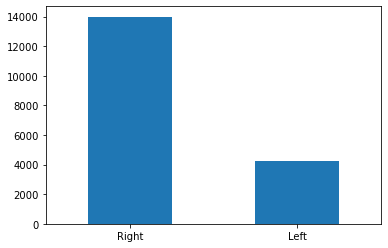

In [105]:
df['Preferred Foot'].value_counts().plot(kind='bar',rot=0)

In [106]:
df['Preferred Foot']=np.where(df['Preferred Foot']=='Right',0,1)

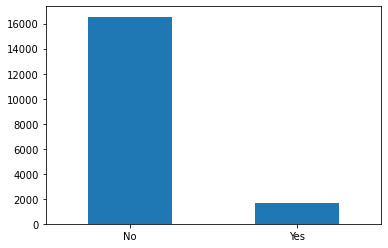

In [107]:
df['Real Face'].value_counts().plot(kind='bar',rot=0)

In [108]:
realf_dict={'No':0,'Yes':1}
df['Real Face']=df['Real Face'].map(realf_dict)

In [109]:
body_type_dict=df['Body Type'].value_counts().head(3).to_dict()

In [110]:
df["Body Type"]=df['Body Type'].map(body_type_dict)

In [111]:
df['Body Type'].unique()

array([   nan,  6417., 10643.,  1140.])

In [112]:
df['Body Type'].fillna(0,inplace=True)

In [113]:
df[df_cat].head()

,Name,Nationality,Club,Preferred Foot,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until
0,L. Messi,3.0,FC Barcelona,1,0.0,1,RF,2004,Missing,2021
1,Cristiano Ronaldo,21.0,Juventus,0,0.0,1,ST,2018,Missing,2022
2,Neymar Jr,5.0,Paris Saint-Germain,0,0.0,1,LW,2017,Missing,2022
3,De Gea,2.0,Manchester United,0,6417.0,1,GK,2011,Missing,2020
4,K. De Bruyne,25.0,Manchester City,0,10643.0,1,RCM,2015,Missing,2023


In [114]:
position_dict=df['Position'].value_counts().to_dict()

In [115]:
df['Position']=df['Position'].map(position_dict)

In [116]:
df[df_cat].head()

,Name,Nationality,Club,Preferred Foot,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until
0,L. Messi,3.0,FC Barcelona,1,0.0,1,16,2004,Missing,2021
1,Cristiano Ronaldo,21.0,Juventus,0,0.0,1,2159,2018,Missing,2022
2,Neymar Jr,5.0,Paris Saint-Germain,0,0.0,1,382,2017,Missing,2022
3,De Gea,2.0,Manchester United,0,6417.0,1,2036,2011,Missing,2020
4,K. De Bruyne,25.0,Manchester City,0,10643.0,1,391,2015,Missing,2023


In [117]:
df['Club'].value_counts()

Cardiff City                           34
West Ham United                        34
Frosinone                              34
Manchester United                      34
Valencia CF                            34
CD Leganés                             34
Fortuna Düsseldorf                     34
Manchester City                        34
RC Celta                               34
Eintracht Frankfurt                    34
Fulham                                 33
Borussia Dortmund                      33
Tottenham Hotspur                      33
FC Nantes                              33
Everton                                33
Arsenal                                33
Rayo Vallecano                         33
Liverpool                              33
Burnley                                33
Huddersfield Town                      33
FC Barcelona                           33
Real Madrid                            33
Chelsea                                33
Atlético Madrid                   

In [118]:
df_club=df.groupby(['Club'])['Release Clause'].mean().sort_values().to_dict()

In [119]:
df['Club']=df['Club'].map(df_club)

In [120]:
df[df_cat].head()

,Name,Nationality,Club,Preferred Foot,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until
0,L. Messi,3.0,7.771030,1,0.0,1,16,2004,Missing,2021
1,Cristiano Ronaldo,21.0,8.122569,0,0.0,1,2159,2018,Missing,2022
2,Neymar Jr,5.0,7.490712,0,0.0,1,382,2017,Missing,2022
3,De Gea,2.0,7.496024,0,6417.0,1,2036,2011,Missing,2020
4,K. De Bruyne,25.0,7.548023,0,10643.0,1,391,2015,Missing,2023


In [121]:
df_loan=df.groupby(['Loaned From'])['Release Clause'].mean().sort_values().to_dict()
df_loan

{'Port Vale': 3.9318256327243257,
 'Defensa y Justicia': 4.0342014792848495,
 'Eintracht Braunschweig': 4.477336814478207,
 'CD Palestino': 4.61512051684126,
 'FC Zürich': 4.61512051684126,
 'CD Antofagasta': 4.709530201312334,
 'Independiente Santa Fe': 4.709530201312334,
 'SV Zulte-Waregem': 4.709530201312334,
 'Bursaspor': 4.709530201312334,
 'Scunthorpe United': 4.709530201312334,
 'Club Necaxa': 4.709530201312334,
 'RCD Espanyol': 4.752660373454537,
 'Chongqing Dangdai Lifan FC SWM Team': 4.770684624465665,
 'Club Atlético Lanús': 4.795790545596741,
 'La Berrichonne de Châteauroux': 4.795790545596741,
 'PEC Zwolle': 4.795790545596741,
 'Doncaster Rovers': 4.839296234091556,
 'San Lorenzo de Almagro': 4.871133654347581,
 'Östersunds FK': 4.875197323201151,
 'Al Nassr': 4.942466054752157,
 'Incheon United FC': 4.943863958980166,
 'Vålerenga Fotball': 4.948759890378168,
 'Kayserispor': 4.948759890378168,
 'Club Atlético Tigre': 4.948759890378168,
 'Bahia': 4.948759890378168,
 'Seattl

In [122]:
df['Loaned From']=df['Loaned From'].map(df_loan)

In [123]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,3.0,94,94,7.771030,9.310276,6.338594,2202,1,5.0,4.0,4.0,104.0,0.0,1,16,10.0,2004,5.995017,2021,5.7,159.0,882.000000,882.000000,882.000000,922.000000,932.000000,932.000000,932.000000,922.000000,932.000000,932.000000,932.000000,912.000000,842.000000,842.000000,842.000000,912.000000,642.000000,612.000000,612.000000,612.000000,642.000000,592.000000,472.000000,472.000000,472.000000,592.000000,84.0,4.564348,4.262680,4.510860,86.0,4.584967,93.0,94.0,87.0,4.574711,91.0,86.0,91.0,95.0,95.0,4.454347,68.0,4.290459,59.0,4.553877,48.0,3.135494,4.553877,94.0,4.330733,96.0,3.526361,3.367296,3.295837,1.945910,2.484907,2.772589,2.708050,2.197225,10.027959
1,Cristiano Ronaldo,33,21.0,94,94,8.122569,8.949105,6.006353,2228,0,5.0,4.0,5.0,104.0,0.0,1,2159,7.0,2018,5.995017,2022,6.2,183.0,913.000000,913.000000,913.000000,893.000000,903.000000,903.000000,903.000000,893.000000,883.000000,883.000000,883.000000,883.000000,813.000000,813.000000,813.000000,883.000000,653.000000,613.000000,613.000000,613.000000,653.000000,613.000000,533.000000,533.000000,533.000000,613.000000,84.0,4.553877,4.499810,4.406719,87.0,4.488636,81.0,76.0,77.0,4.553877,89.0,91.0,87.0,96.0,70.0,4.564348,95.0,4.488636,79.0,4.543295,63.0,3.401197,4.564348,82.0,4.454347,95.0,3.367296,3.465736,3.178054,2.079442,2.484907,2.772589,2.708050,2.484907,9.450223
2,Neymar Jr,26,5.0,92,93,7.490712,9.380168,5.673323,2143,0,5.0,5.0,5.0,104.0,0.0,1,382,10.0,2017,5.995017,2022,5.9,150.0,843.000000,843.000000,843.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,883.000000,813.000000,813.000000,813.000000,883.000000,653.000000,603.000000,603.000000,603.000000,653.000000,603.000000,473.000000,473.000000,473.000000,603.000000,79.0,4.477337,4.143135,4.442651,84.0,4.574711,88.0,87.0,78.0,4.564348,94.0,90.0,96.0,94.0,84.0,4.394449,61.0,4.406719,49.0,4.418841,56.0,3.610918,4.499810,87.0,4.406719,94.0,3.332205,3.218876,3.526361,2.302585,2.302585,2.772589,2.772589,2.484907,10.034998
3,De Gea,27,2.0,91,93,7.496024,8.881975,5.564520,1471,0,4.0,3.0,1.0,104.0,6417.0,1,2036,1.0,2011,5.995017,2020,6.4,168.0,580.175226,580.175226,580.175226,592.397035,589.214427,589.214427,589.214427,592.397035,591.851817,591.851817,591.851817,599.367634,584.229314,584.229314,584.229314,599.367634,577.153269,570.271989,570.271989,570.271989,577.153269,570.088389,558.166791,558.166791,558.166791,570.088389,17.0,2.639057,3.091042,3.931826,13.0,2.944439,21.0,19.0,51.0,3.761200,57.0,58.0,60.0,90.0,43.0,3.465736,67.0,3.784190,64.0,2.564949,38.0,3.433987,2.564949,68.0,3.713572,68.0,2.772589,3.091042,2.639057,4.510860,4.454347,4.477337,4.488636,4.553877,9.536834
4,K. De Bruyne,27,25.0,91,92,7.548023,9.230241,5.874931,2281,0,4.0,5.0,4.0,104.0,10643.0,1,391,7.0,2015,5.995017,2023,5.1,154.0,823.000000,823.000000,823.000000,873.000000,873.000000,873.000000,873.000000,873.000000,883.000000,883.000000,883.000000,883.000000,873.000000,873.000000,873.000000,883.000000,773.000000,773.000000,773.000000,773.000000,773.000000,733.000000,663.000000,663.000000,663.000000,733.000000,93.0,4.418841,4.025352,4.532599,82.0,4.465908,85.0,83.0,91.0,4.521789,78.0,76.0,79.0,91.0,77.0,4.521789,63.0,4.510860,75.0,4.521789,76.0,4.127134,4.477337,94.0,4.382027,88.0,4.234107,4.077537,3.951244,2.772589,2.639057,1.791759,2.39

In [124]:
df['Joined']=df['Joined'].astype(int)
df['Contract Valid Until']=df['Contract Valid Until'].astype(int)

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
X=df.drop(['Name','Joined','Contract Valid Until','Release Clause'],axis=1)
y=df['Release Clause']

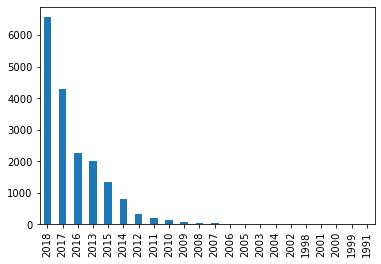

In [127]:
df['Joined'].value_counts().plot(kind='bar')

In [128]:
X_train=X[df['Joined']>=2016]
y_train=y[df['Joined']>=2016]

In [129]:
X_test=X[df['Joined']<2016]
y_test=y[df['Joined']<2016]

In [130]:
model=LinearRegression()

In [131]:
model.fit(X_train,y_train)

LinearRegression()

In [132]:
y_pred=model.predict(X_test)

In [133]:
import statsmodels.api as sm

In [134]:
result=sm.OLS(y,X).fit()

In [135]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Release Clause   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     185.2
Date:                Sun, 23 Aug 2020   Prob (F-statistic):               0.00
Time:                        04:21:33   Log-Likelihood:                -19933.
No. Observations:               18207   AIC:                         3.999e+04
Df Residuals:                   18143   BIC:                         4.049e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0361      0.003    -13.906      0.000      -0.041      -0.031
Nationality                  0.0009      0.000      3.085      0.002       0.000       0.001
Overall                      0.0591      0.003     19.027      0.000       0.053       0.065
Potential                   -0.0157      0.002     -7.062      0.000      -0.020      -0.011
Club                         0.5512      0.016     34.060      0.000       0.519       0.583
Value                        0.0887      0.006     15.032      0.000       0.077       0.100
Wage                        -0.0367      0.010     -3.772      0.000      -0.056      -0.018
Special                      0.0025      0.000      5.445      0.000       0.002       0.003
Preferred Foot              -0.0151      0.013     -1.125      0.261      -0.041       0.011
International Reputation     0.1798      0.012     14.698      0.000       0.156       0.204
Weak Foot                   -0.0035      0.008     -0.412      0.680      -0.020       0.013
Skill Moves                 -0.1727      0.012    -14.613      0.000      -0.196      -0.150
Work Rate                   -0.0189      0.006     -3.111      0.002      -0.031      -0.007
Body Type                -2.311e-07   1.96e-06     -0.118      0.906   -4.08e-06    3.62e-06
Real Face                    0.1544      0.022      6.954      0.000       0.111       0.198
Position                 -1.377e-05    1.1e-05     -1.251      0.211   -3.53e-05     7.8e-06
Jersey Number               -0.0014      0.000     -3.870      0.000      -0.002      -0.001
Loaned From                  0.9323      0.041     22.972      0.000       0.853       1.012
Height                       0.0017      0.014      0.129      0.897      -0.025       0.028
Weight                      -0.0009      0.001     -1.622      0.105      -0.002       0.000
LS                          -0.0006      0.000     -2.052      0.040      -0.001   -2.63e-05
ST                          -0.0006      0.000     -2.052      0.040      -0.001   -2.63e-05
RS                          -0.0006      0.000     -2.052      0.040      -0.001   -2.63e-05
LW                          -0.0011      0.001     -1.504      0.133      -0.003       0.000
LF                           0.0012      0.001      2.356      0.018       0.000       0.002
CF                           0.0012      0.001      2.356      0.018       0.000       0.002
RF                           0.0012      0.001      2.356      0.018       0.000       0.002
RW                          -0.0011      0.001     -1.504      0.133      -0.003       0.000
LAM                       8.335e-05      0.000      0.168      0.867      -0.001       0.001
CAM                       8.335e-05      0.000      0.168      0.867      -0.001       0.001
RAM           

# Feature Selection

In [166]:
X1=df.drop(['Name','Joined','Contract Valid Until','Release Clause','LS',"ST",'RS','LW','LF','CF','RF','RW','LM','LCM','CM','RCM','LB','RB','ShortPassing','BallControl','ShotPower','Jumping','Positioning','LongShots'],axis=1)
X_train1=X1[df['Joined']>=2016]
X_test1=X1[df['Joined']<2016]

In [167]:
from sklearn.ensemble import RandomForestRegressor

In [168]:
model=RandomForestRegressor(n_estimators=15)

In [169]:
model.fit(X_train1,y_train)

RandomForestRegressor(n_estimators=15)

In [170]:
y_pred=model.predict(X_test1)

In [171]:
model.score(X_train1,y_train)

0.9699912810322605